In [1]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

## BER Graph

#### Examine 5 runs for dataset

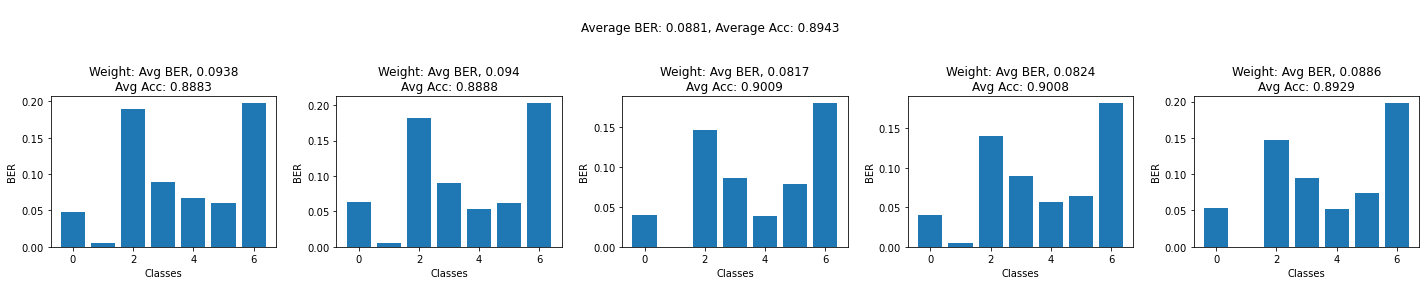

In [20]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(1,5)
i=0; j=0

# folder_dict={"DF":"DF", "Baseline":"Baseline", "Weight":"Weight","Grad":"Grad",
#              "Phases-Simul":"Phases", "Phases-ThresholdedSimul":"Phases", "NFS":"NFS"} #model: folder
folder_dict={"Baseline":"Baseline", "DF":"DF", "NFS":"NFS","Weight":"Weight", "Grad":"Grad"}
model="Weight"

epoch=200
# fig.set_figheight(5)
fig.set_figwidth(20)

avg_ber= []
avg_acc= []
for folder in range(5):
    ber= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{folder_dict[model]}/DryBean-{model}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{folder_dict[model]}/DryBean-{model}-v_dict-{epoch}.pkl", "rb") )
    axes[j].bar([i for i in range(len(ber))], ber)
    axes[j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[j].set_xlabel("Classes")
    axes[j].set_ylabel("BER")
    j += 1
    
    avg_ber.append(np.mean(ber))
    avg_acc.append(np.mean(dictionary['accuracy']))
plt.suptitle(f"\nAverage BER: {round(np.mean(avg_ber),4)}, Average Acc: {round(np.mean(avg_acc), 4)}\n" )

plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

## Baseline

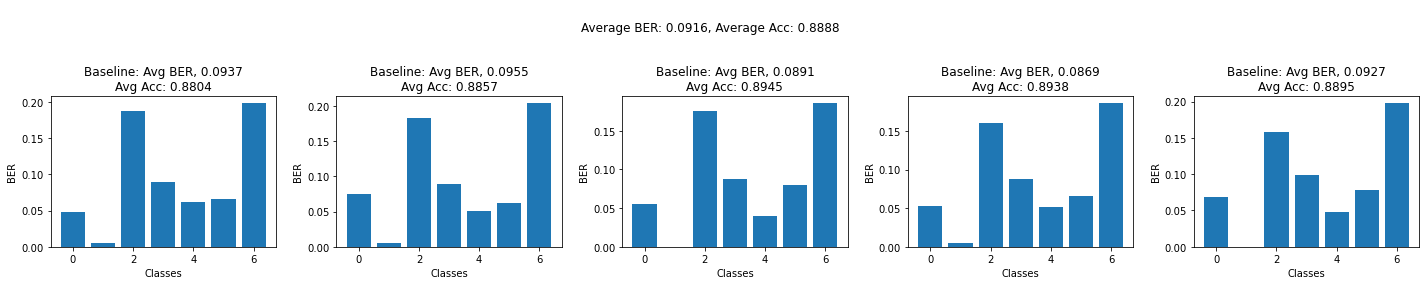

# DF

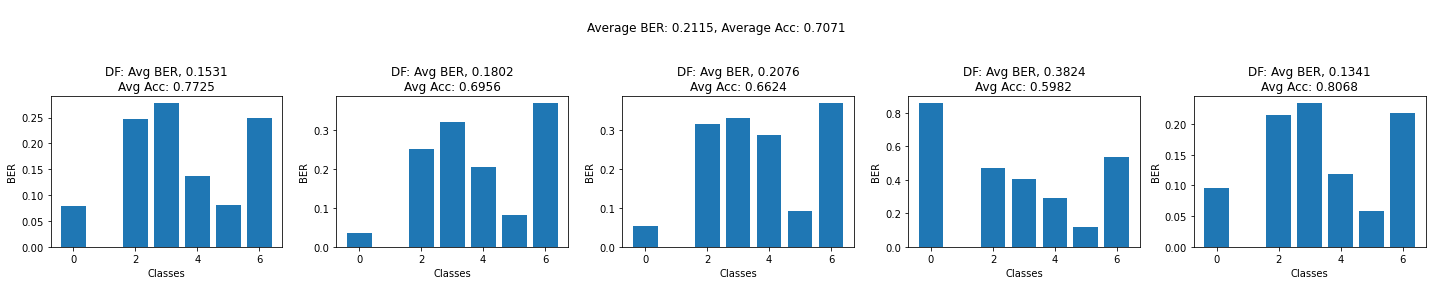

# NFS

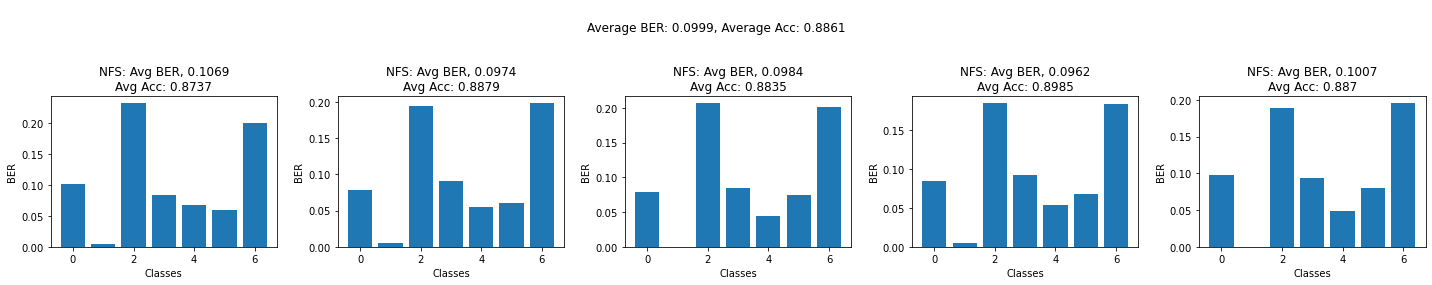

# Weight

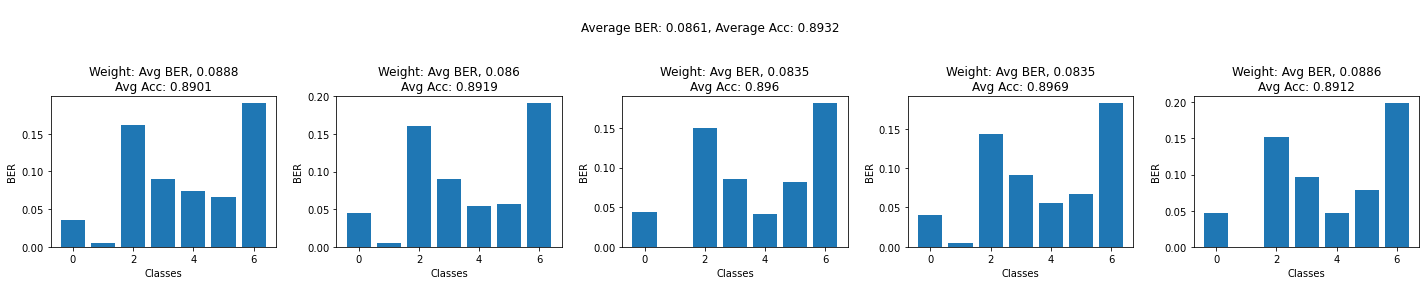

# Grad

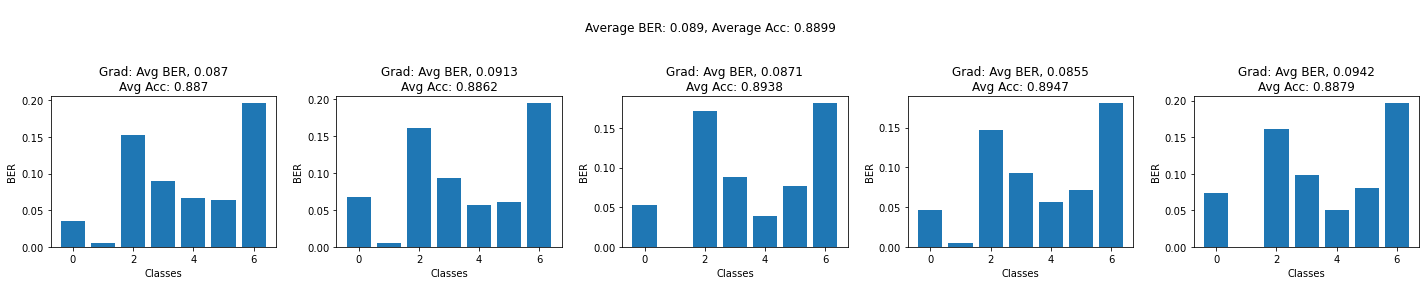

## Subset

## RS: save subset

In [113]:
import pickle
import os
epoch=200
for folder in range(5):
    for percentile in range(10,100,10):
        rs=[]
        dictionaries=[]
        for rs_folder in range(5):
            ber= pickle.load(open(f"./experiments/DryBean/exp_log{folder}/RS/RS{rs_folder}/DryBean-subset-RS{rs_folder}-{percentile}-ber-{epoch}.pkl", "rb"))
            rs.append(ber)
        
            dictionary= pickle.load(open(f"./experiments/DryBean/exp_log{folder}/RS/RS{rs_folder}/DryBean-subset-RS{rs_folder}-{percentile}-v_dict-{epoch}.pkl", "rb")).copy()
            dictionaries.append({"accuracy":dictionary["accuracy"], "macro avg":{"precision": dictionary["macro avg"]["precision"], "recall": dictionary["macro avg"]["recall"], "f1-score": dictionary["macro avg"]["f1-score"]}})
        if not os.path.exists(f"./experiments/DryBean/exp_log{folder}/RS/subset"):
            os.mkdir(f"./experiments/DryBean/exp_log{folder}/RS/subset")
#         pickle.dump(np.array(rs).mean(0), open(f"./experiments/DryBean/exp_log{folder}/RS/subset/DryBean-subset-RS-{percentile}-ber-{epoch}.pkl", "wb"))
        dictionary= {"accuracy":np.mean([i['accuracy'] for i in dictionaries]), "macro avg":{"precision": np.mean([i['macro avg']['precision'] for i in dictionaries]), "recall":np.mean([i['macro avg']['recall'] for i in dictionaries]), "f1-score":np.mean([i['macro avg']['f1-score'] for i in dictionaries])} }
#         pickle.dump(dictionary, open(f"./experiments/DryBean/exp_log{folder}/RS/subset/DryBean-subset-RS-{percentile}-v_dict-{epoch}.pkl", "wb"))    

In [112]:
dictionary

{'accuracy': 0.6602830362065797,
 'macro avg': {'precision': 0.5883239631731707,
  'recall': 0.6401244532445614,
  'f1-score': 0.5993362610731654}}

## RS

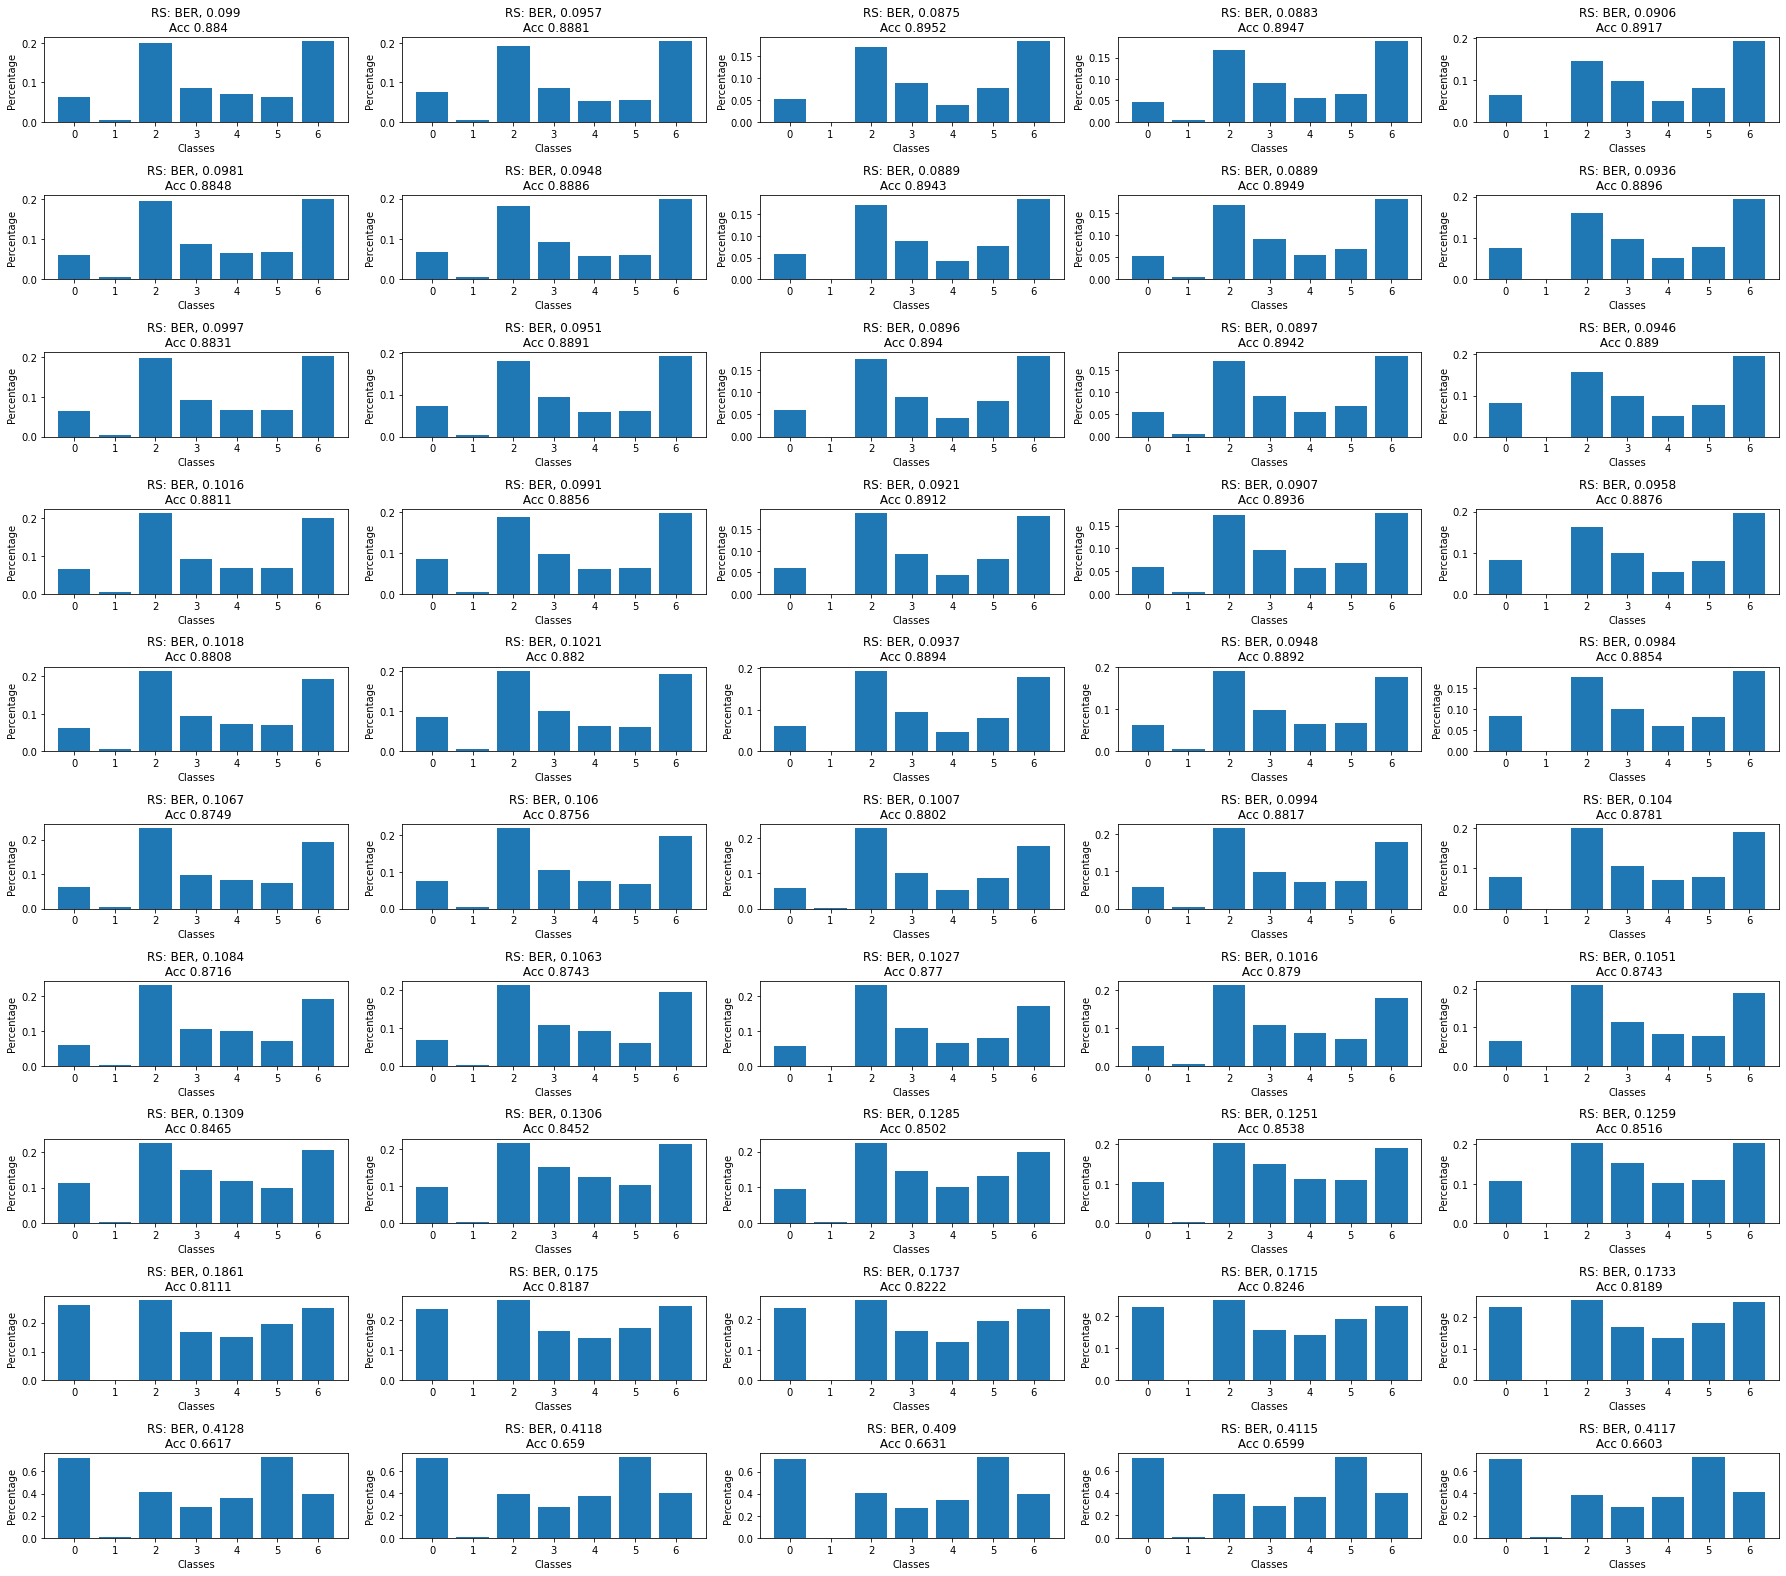

In [145]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight"} #folder: model
model="RS"
epoch=200

fig.set_figheight(22)
fig.set_figwidth(25)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{original_dict[model]}/DryBean-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{original_dict[model]}/DryBean-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )
    
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{model}/subset/DryBean-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{model}/subset/DryBean-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    j += 1; i=1
    
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

## Weight

In [35]:
for folder in range(5):
    w= pickle.load(open(f"./experiments/DryBean/exp_log{folder}/Weight/DryBean-Weight-w-200.pkl","rb"))
    print(np.percentile(w, [10,20,30,40,50,60,70,80,90]))
    

[1.04364043 1.35986996 1.36582875 1.48534501 1.51017714 1.55366242
 1.60574424 1.64023352 1.64348543]
[1.05267012 1.24841905 1.32585466 1.477054   1.53244627 1.60573256
 1.65280735 1.67064178 1.69800186]
[1.04266173 1.35908973 1.42115963 1.46270013 1.52327609 1.54201555
 1.60793728 1.6537621  1.69512439]
[1.01634529 1.27618515 1.38908678 1.44300795 1.50089681 1.55187559
 1.63279307 1.69563234 1.73551273]
[0.96464965 1.25090003 1.41343504 1.51984298 1.52863717 1.57208681
 1.59334993 1.68268681 1.71867096]


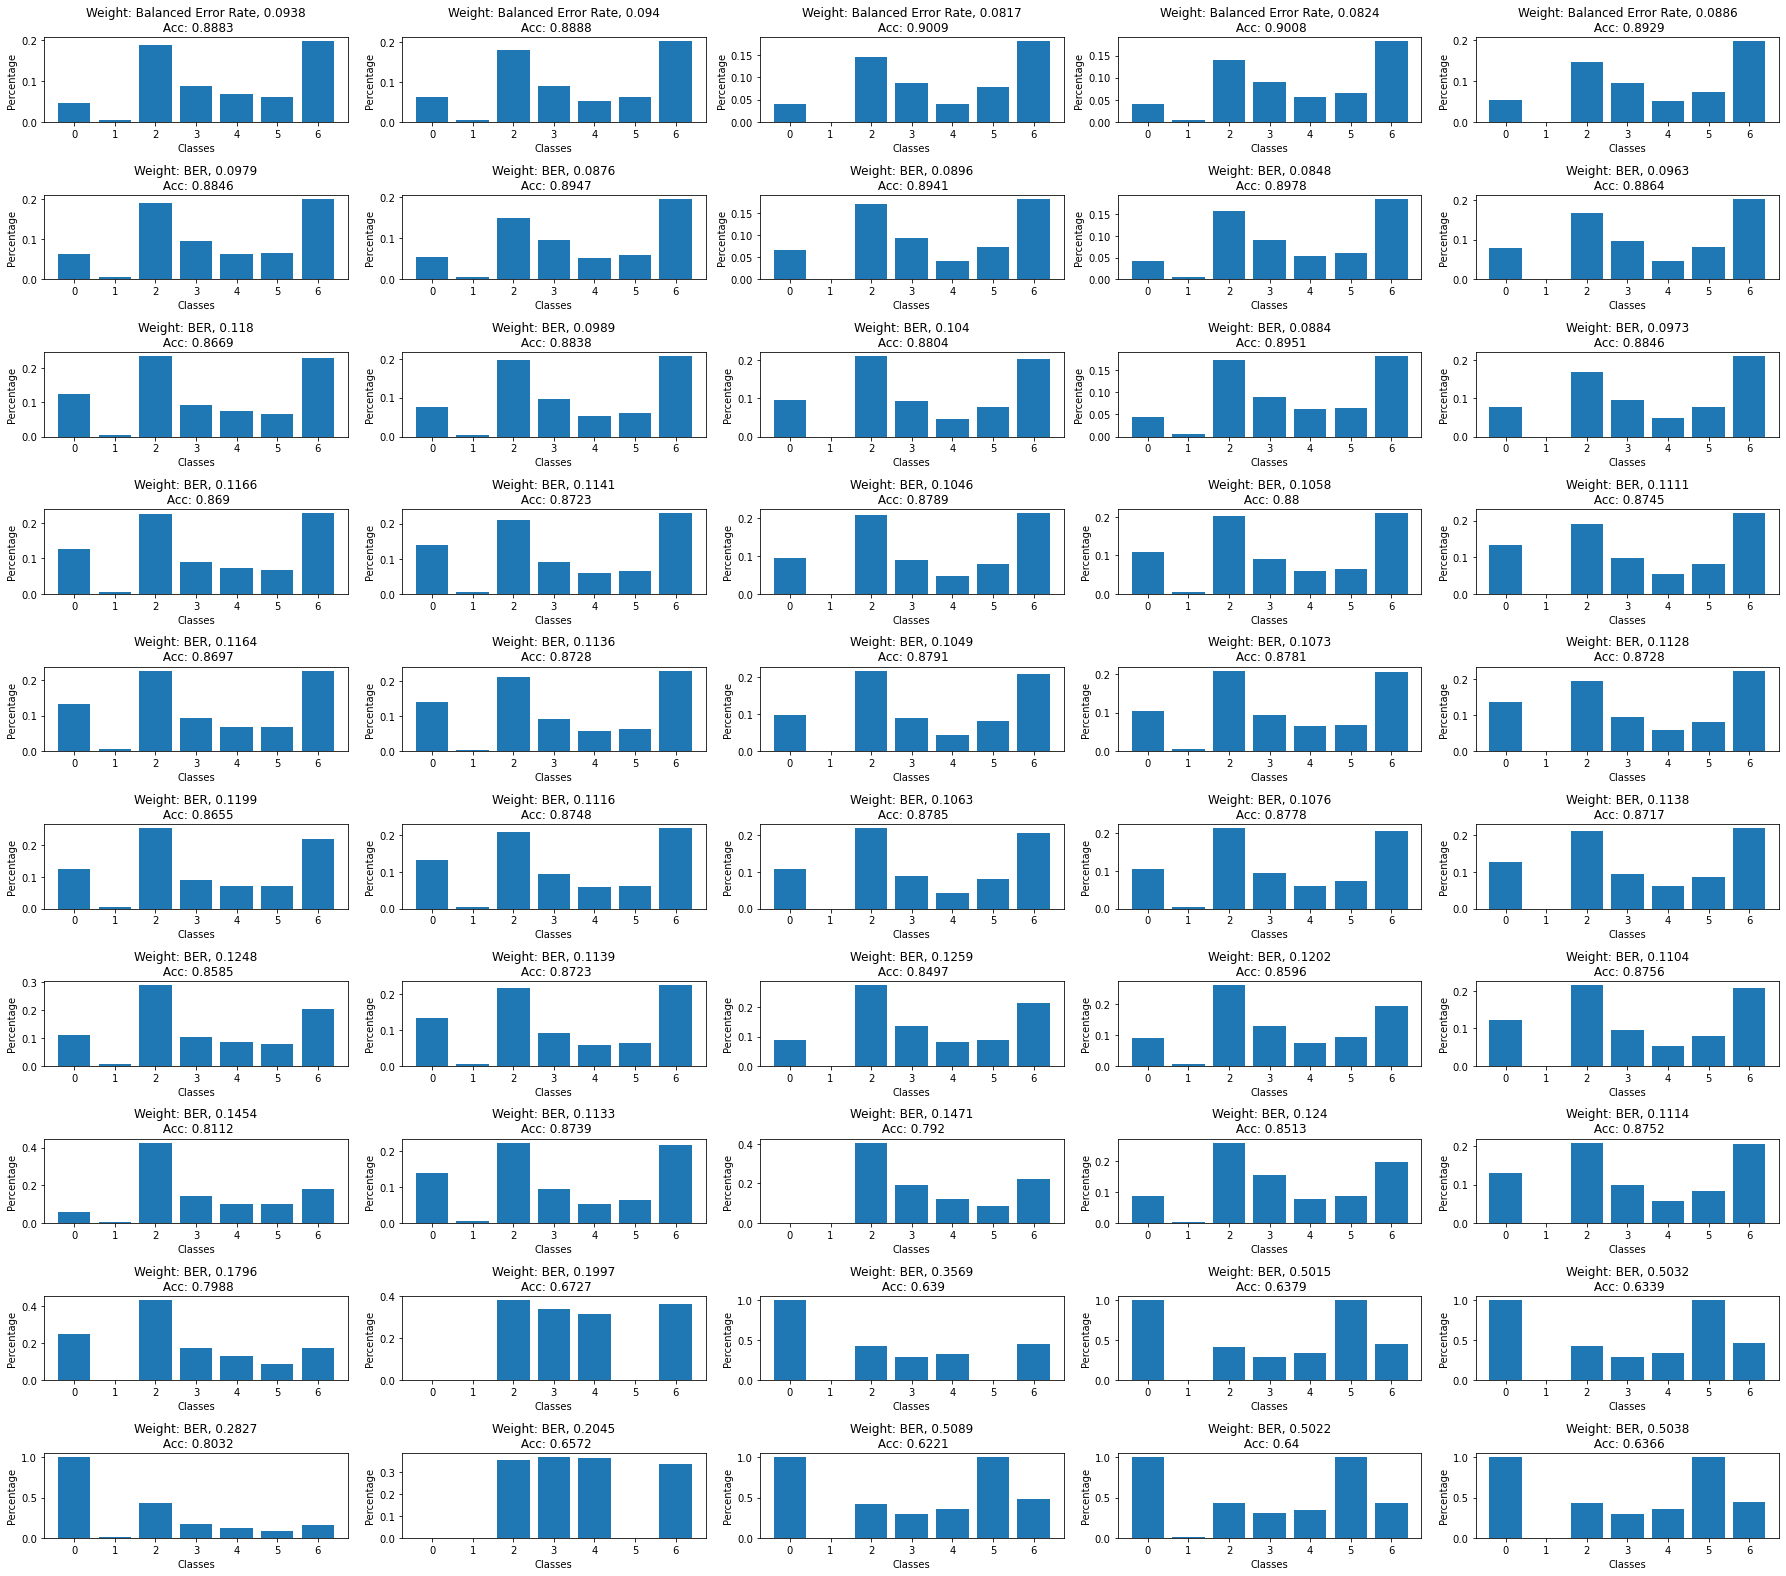

In [148]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight"} #folder: model
model="Weight"

weight_ber=[]
epoch=200
fig.set_figheight(22)
fig.set_figwidth(25)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{original_dict[model]}/DryBean-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{original_dict[model]}/DryBean-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )
    
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Balanced Error Rate, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    bers=[]
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{model}/subset/DryBean-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{model}/subset/DryBean-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        bers.append(round(np.mean(ber),4))
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    weight_ber.append(bers)
    j += 1; i=1
weight_ber= np.array(weight_ber)
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

### Z-score

In [166]:
import scipy.stats as st
for i in range(weight_ber.shape[1]):
    ber_list=np.array(weight_ber[:,i])
    print(i+1, ber_list)
    count=0
    for value in weight_ber[:, i]:
        z_score= (value - ber_list.mean()) / ber_list.std()
        print(f"{i+1}.{count}")
        print("cdf:", st.norm.cdf(z_score))
        if st.norm.cdf(z_score) > 0.5:
            print("from mean", st.norm.cdf(z_score)-0.5) # % from the mean
        else:
            print("from mean", 0.5-st.norm.cdf(z_score))
        print()
        count += 1

1 [0.0924 0.093  0.0907 0.0871 0.0922]
1.0
cdf: 0.7323526109424786
from mean 0.2323526109424786

1.1
cdf: 0.8164015593960692
from mean 0.3164015593960692

1.2
cdf: 0.4291774603965564
from mean 0.07082253960344359

1.3
cdf: 0.030795791258797636
from mean 0.4692042087412024

1.4
cdf: 0.7005603896980975
from mean 0.20056038969809753

2 [0.1027 0.0986 0.094  0.1063 0.1093]
2.0
cdf: 0.5381147354580532
from mean 0.03811473545805322

2.1
cdf: 0.25502611197964803
from mean 0.24497388802035197

2.2
cdf: 0.06613593184567922
from mean 0.43386406815432077

2.3
cdf: 0.775810984077399
from mean 0.275810984077399

2.4
cdf: 0.9049278487300467
from mean 0.4049278487300467

3 [0.1095 0.112  0.1043 0.1059 0.1111]
3.0
cdf: 0.6237982583626125
from mean 0.12379825836261249

3.1
cdf: 0.8758508294213916
from mean 0.3758508294213916

3.2
cdf: 0.07640283289267176
from mean 0.42359716710732825

3.3
cdf: 0.18600410904403358
from mean 0.3139958909559664

3.4
cdf: 0.8030164208160284
from mean 0.3030164208160284

4 

## DF

In [36]:
for folder in range(5):
    w= pickle.load(open(f"./experiments/DryBean/exp_log{folder}/DF/DryBean-DF-w-200.pkl","rb"))
    print(np.percentile(w, [10,20,30,40,50,60,70,80,90]))
    

[-0.00024021  0.00053106  0.0024308   0.05414223  0.07487407  0.09389687
  0.10431295  0.12454439  0.1407187 ]
[-2.54220635e-04  3.01959208e-05  6.12998148e-04  2.09370814e-02
  9.94608253e-02  1.03235655e-01  1.06327869e-01  1.09645106e-01
  1.20955370e-01]
[-1.04231585e-05  1.75169815e-04  5.07486402e-04  1.95387676e-02
  8.85967314e-02  9.75230187e-02  1.05215587e-01  1.20001145e-01
  1.30847000e-01]
[-1.02086651e-05  1.33134163e-04  3.06428134e-04  6.27100235e-04
  2.78773461e-03  3.95065965e-03  8.29465911e-02  1.17282726e-01
  1.47368625e-01]
[-0.00121345  0.00025319  0.00151533  0.02426646  0.0523606   0.08807349
  0.10488643  0.11618604  0.15746793]


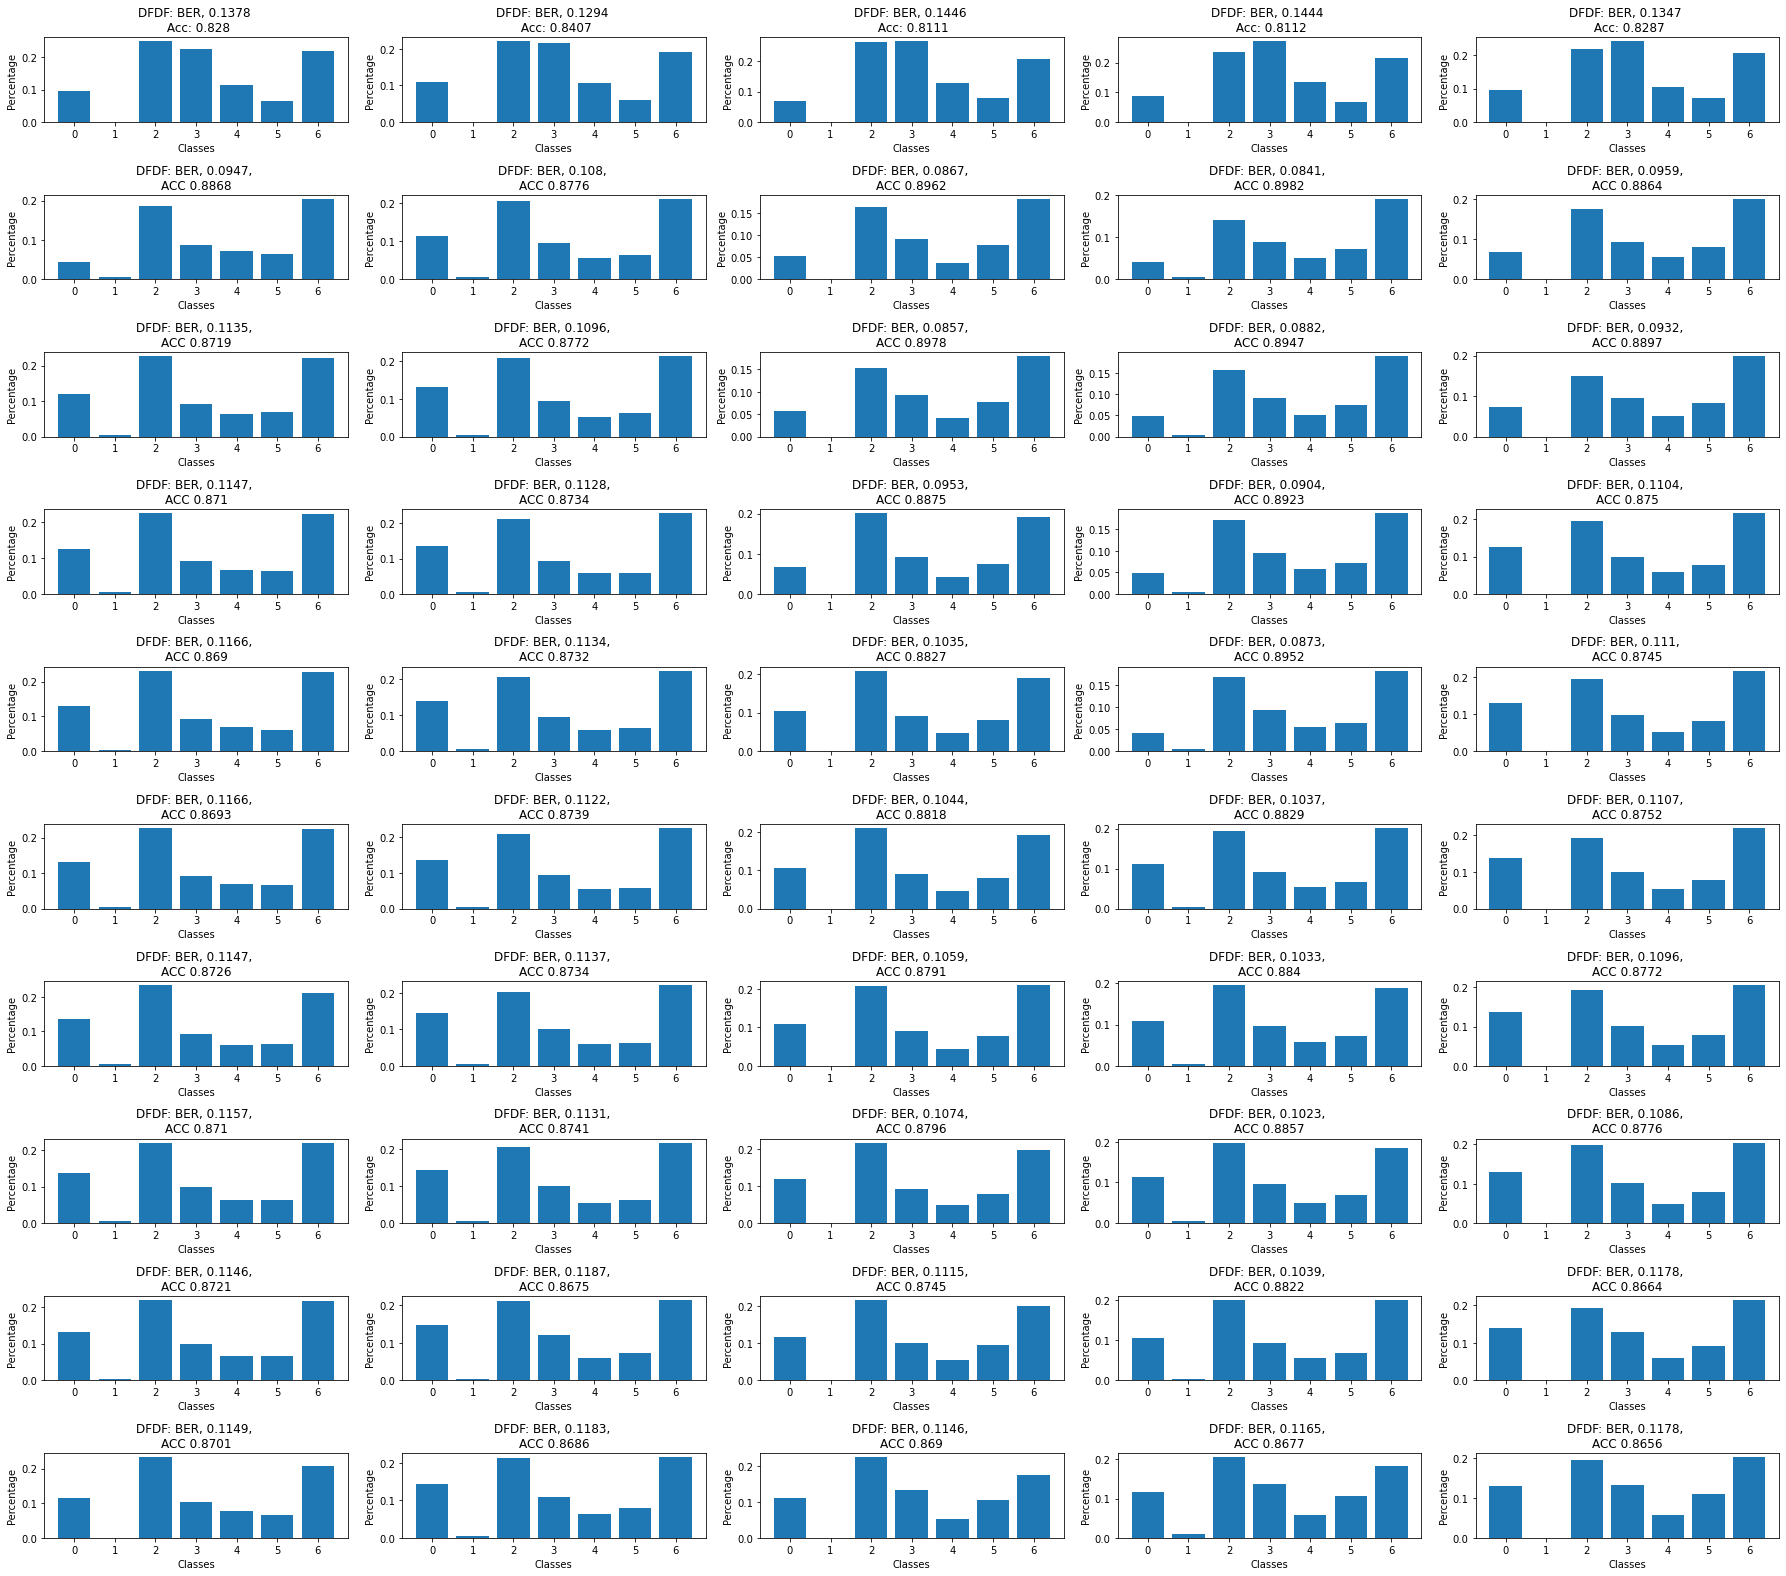

In [48]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight"} #folder: model
model="DF"
epoch=200
df_ber=[]

fig.set_figheight(22)
fig.set_figwidth(25)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{original_dict[model]}/DryBean-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{original_dict[model]}/DryBean-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )
    
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(model+f"{model}: BER, {round(np.mean(ber),4)} \n Acc: {round(dictionary['accuracy'], 4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    bers=[]
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{model}/subset/DryBean-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{model}/subset/DryBean-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )

        
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(model+f"{model}: BER, {round(np.mean(ber),4)}, \nACC {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
        bers.append(round(np.mean(ber),4))
    df_ber.append(bers)
    j += 1; i=1
df_ber= np.array(df_ber)
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

### Z-score

In [144]:
import scipy.stats as st
for i in range(df_ber.shape[1]):
    ber_list=np.array(df_ber[:,i])
    print(i+1, ber_list)
    count=0
    for value in df_ber[:, i]:
        z_score= (value - ber_list.mean()) / ber_list.std()
        print(f"{i+1}.{count}")
        print("cdf:", st.norm.cdf(z_score))
        if st.norm.cdf(z_score) > 0.5:
            print("from mean", st.norm.cdf(z_score)-0.5) # % from the mean
        else:
            print("from mean", 0.5-st.norm.cdf(z_score))
        print()
        count += 1

1 [0.1089 0.0922 0.0884 0.0937 0.0937]
1.0
cdf: 0.9727317314408349
from mean 0.4727317314408349

1.1
cdf: 0.32556335185370233
from mean 0.17443664814629767

1.2
cdf: 0.16046238155669407
from mean 0.33953761844330593

1.3
cdf: 0.40559280489105465
from mean 0.09440719510894535

1.4
cdf: 0.40559280489105465
from mean 0.09440719510894535

2 [0.11   0.0953 0.0919 0.0909 0.1064]
2.0
cdf: 0.922229901378616
from mean 0.42222990137861605

2.1
cdf: 0.32253716146066597
from mean 0.17746283853933403

2.2
cdf: 0.1852220782971824
from mean 0.3147779217028176

2.3
cdf: 0.15301436363928994
from mean 0.34698563636071006

2.4
cdf: 0.831375770360484
from mean 0.33137577036048405

3 [0.1129 0.0995 0.0915 0.0928 0.1086]
3.0
cdf: 0.9188113186053513
from mean 0.41881131860535126

3.1
cdf: 0.4269753264227913
from mean 0.07302467357720871

3.2
cdf: 0.12964299612192814
from mean 0.37035700387807186

3.3
cdf: 0.16485943600234892
from mean 0.3351405639976511

3.4
cdf: 0.8131919454115408
from mean 0.31319194541154

## NFS

In [37]:
for folder in range(5):
    w= pickle.load(open(f"./experiments/DryBean/exp_log{folder}/NFS/DryBean-NFS-w-200.pkl","rb"))
    print(np.percentile(w, [10,20,30,40,50,60,70,80,90]))
    

[0.21689504 0.33037257 0.36095408 0.37692833 0.54921985 0.63381612
 0.65156868 0.69315058 0.7766487 ]
[0.17258688 0.25435531 0.35773267 0.38301361 0.56263947 0.63148832
 0.74485764 0.84553957 0.85300303]
[0.06073043 0.13244589 0.20583289 0.27560189 0.32069825 0.46638092
 0.49459384 0.60097438 0.65909547]
[0.11391509 0.12446052 0.22151627 0.32876411 0.4971811  0.5940606
 0.67065415 0.71716946 0.78326014]
[0.15397103 0.19190811 0.34208871 0.47030026 0.5454931  0.68590003
 0.7081641  0.74371374 0.79974696]


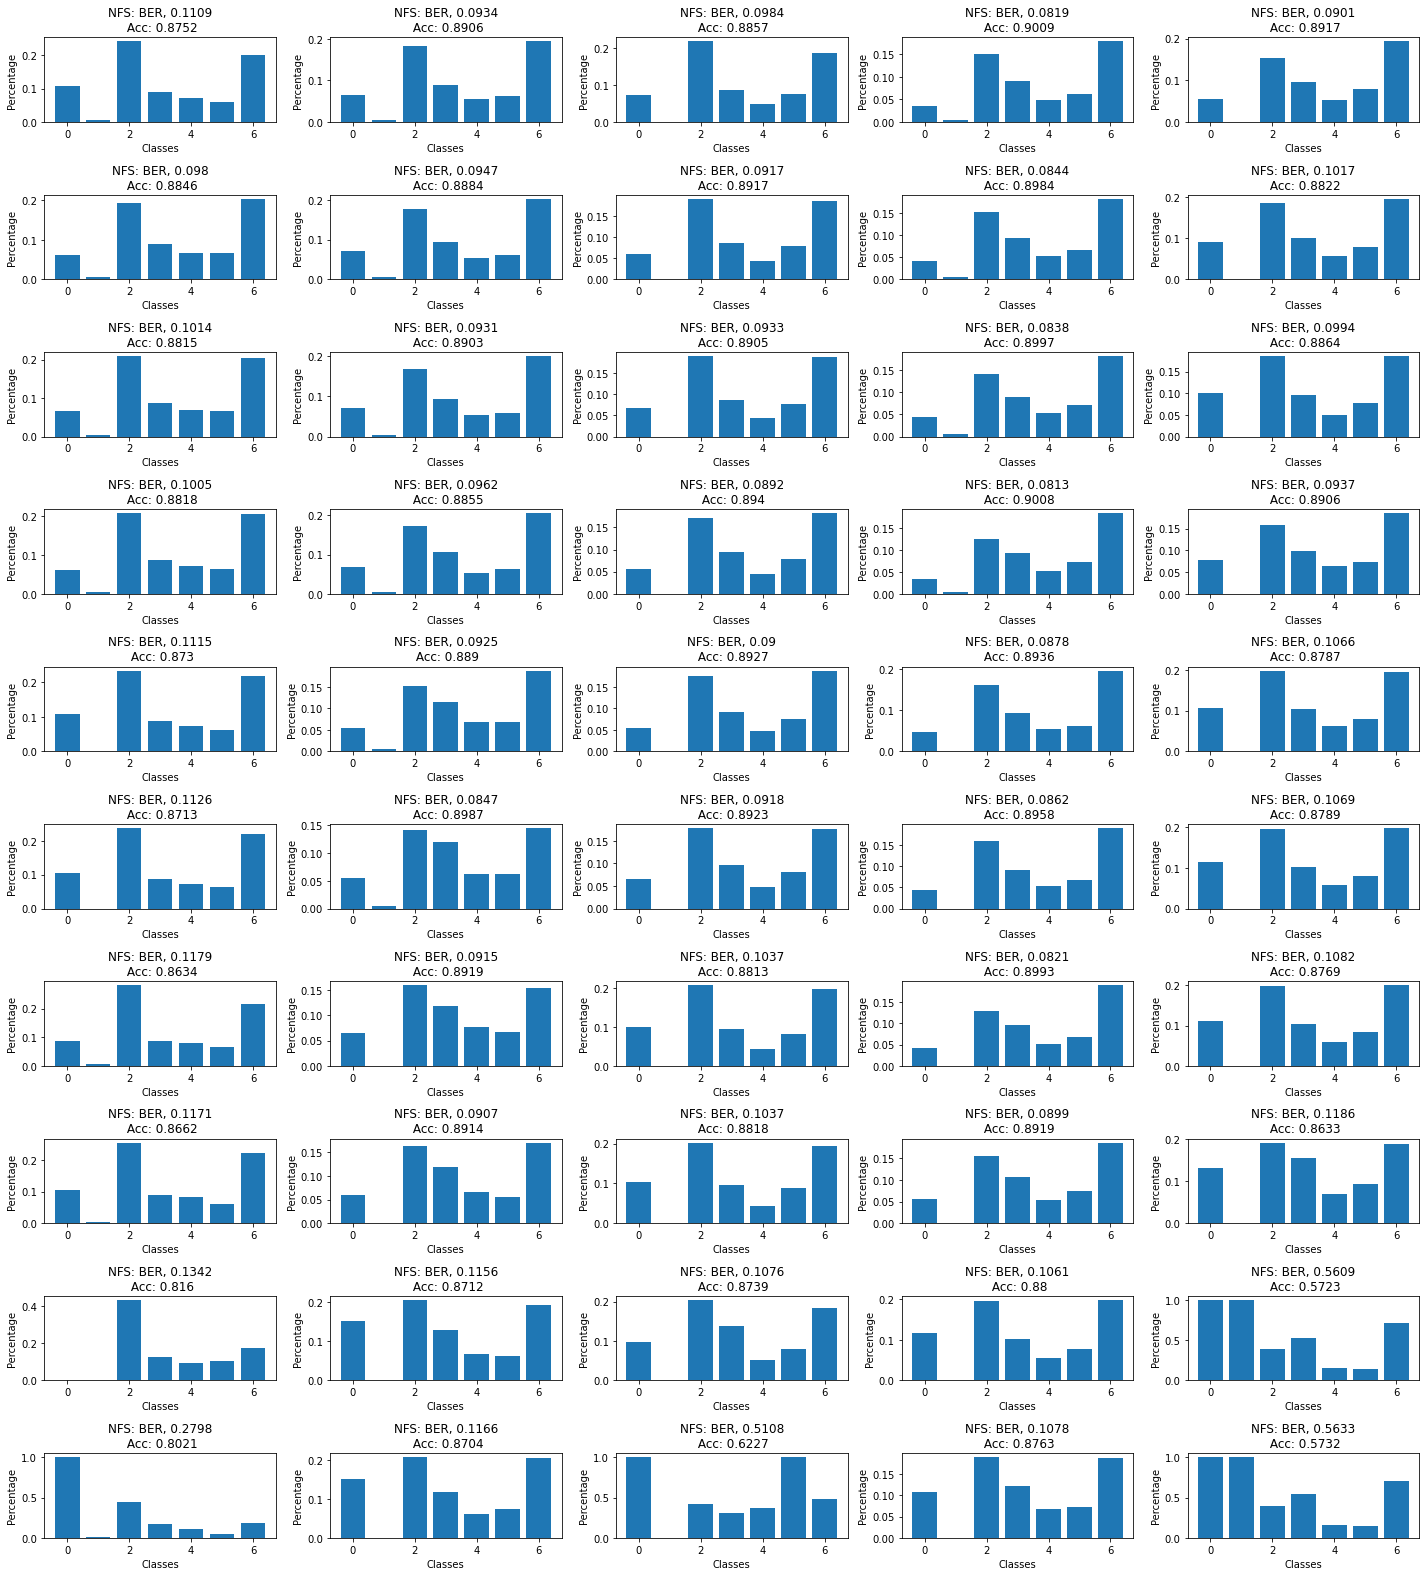

In [149]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline", "NFS":"NFS",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight"} #folder: model
model="NFS"
epoch=200
nfs_ber=[]

fig.set_figheight(22)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{original_dict[model]}/DryBean-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{original_dict[model]}/DryBean-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    bers=[]
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{model}/subset/DryBean-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{model}/subset/DryBean-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )

        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
        bers.append(round(np.mean(ber),4))
    nfs_ber.append(bers)
    j += 1; i=1
nfs_ber= np.array(nfs_ber)
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

### Z-score

In [168]:
import scipy.stats as st
for i in range(nfs_ber.shape[1]):
    ber_list=np.array(nfs_ber[:,i])
    print(i+1, ber_list)
    count=0
    for value in nfs_ber[:, i]:
        z_score= (value - ber_list.mean()) / ber_list.std()
        print(f"{i+1}.{count}")
        print("cdf:", st.norm.cdf(z_score))
        if st.norm.cdf(z_score) > 0.5:
            print("from mean", st.norm.cdf(z_score)-0.5) # % from the mean
        else:
            print("from mean", 0.5-st.norm.cdf(z_score))
        print()
        count += 1

1 [0.0945 0.0927 0.0877 0.0944 0.1017]
1.0
cdf: 0.5266250849684351
from mean 0.026625084968435075

1.1
cdf: 0.36921088520514866
from mean 0.13078911479485134

1.2
cdf: 0.0739357287324135
from mean 0.4260642712675865

1.3
cdf: 0.5177573863510094
from mean 0.01775738635100943

1.4
cdf: 0.9525126428682709
from mean 0.45251264286827086

2 [0.0981 0.0894 0.0893 0.1034 0.1007]
2.0
cdf: 0.6291926820312715
from mean 0.12919268203127154

2.1
cdf: 0.12214934776690661
from mean 0.3778506522330934

2.2
cdf: 0.11870565249157805
from mean 0.38129434750842195

2.3
cdf: 0.8924881071892324
from mean 0.39248810718923244

2.4
cdf: 0.7811863738849611
from mean 0.28118637388496115

3 [0.1078 0.0933 0.088  0.1032 0.1039]
3.0
cdf: 0.8769665363980325
from mean 0.37696653639803246

3.1
cdf: 0.21043223449847503
from mean 0.28956776550152497

3.2
cdf: 0.06386445195316104
from mean 0.43613554804683896

3.3
cdf: 0.7042331835487736
from mean 0.20423318354877362

3.4
cdf: 0.736133729414525
from mean 0.23613372941452

## Grad

#### AUC

In [34]:
from utilities.subset_func import return_epoch_stat
from sklearn.preprocessing import MinMaxScaler
import pickle

channels=["Area","Perimeter","MajorAxisLength","MinorAxisLength","AspectRation",
                               "Eccentricity","ConvexArea","EquivDiameter","Extent","Solidity","roundness","Compactness",
                               "ShapeFactor1", "ShapeFactor2","ShapeFactor3","Shapefactor4"]
folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/DryBean/exp_log{folder}/Grad/list/DryBean-Grad-list-200.pkl","rb"))
    grad_all= np.array(grads).reshape(200,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [10,20,30,40,50,60,70,80,90]))
    

[0.07208648 0.22229073 0.27484537 0.33277423 0.40094118 0.46041965
 0.49342513 0.55081564 0.83059872]
[0.02552704 0.14232242 0.25306898 0.38665602 0.44138523 0.49579687
 0.5135269  0.63247367 0.77844934]
[0.02208807 0.09529362 0.29423706 0.40348466 0.4186424  0.42929729
 0.51043495 0.68406734 0.74881716]
[0.04523461 0.10720159 0.27891485 0.31369606 0.4121866  0.44467048
 0.48765449 0.60255467 0.8899133 ]
[0.03422985 0.21619063 0.29948582 0.37899184 0.42996353 0.50870646
 0.5368324  0.69242725 0.84996463]


Text(0.5, 33.0, 'Features')

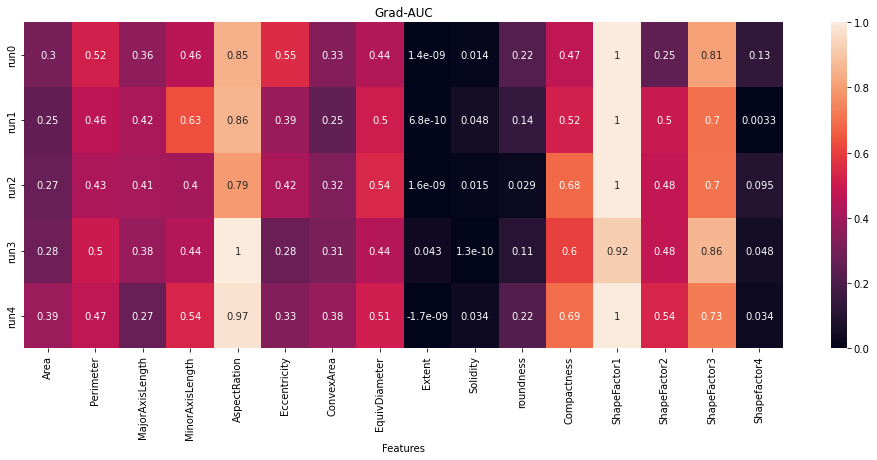

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, yticklabels=[ f"run{i}" for i in range(5)],annot=True)
plt.title("Grad-AUC")
plt.xlabel("Features")

#### STD

In [36]:
from utilities.subset_func import return_epoch_stat
from sklearn.preprocessing import MinMaxScaler
import pickle

channels=["Area","Perimeter","MajorAxisLength","MinorAxisLength","AspectRation",
                               "Eccentricity","ConvexArea","EquivDiameter","Extent","Solidity","roundness","Compactness",
                               "ShapeFactor1", "ShapeFactor2","ShapeFactor3","Shapefactor4"]
folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/DryBean/exp_log{folder}/Grad/list/DryBean-Grad-list-200.pkl","rb"))
    grad_all= np.array(grads).reshape(200,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "std")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [10,20,30,40,50,60,70,80,90]))
    

[0.03166237 0.10869072 0.13922353 0.16514339 0.20010474 0.22571075
 0.28445963 0.38379137 0.4474753 ]
[0.0381644  0.08831601 0.11449513 0.13183694 0.16375571 0.18595404
 0.25460762 0.30122884 0.37953162]
[0.03185563 0.07132446 0.08971635 0.10988161 0.13398341 0.16753668
 0.25188255 0.37682701 0.40573907]
[0.01268441 0.03404795 0.06488779 0.12256223 0.14261749 0.18100343
 0.22160129 0.4199892  0.45739153]
[0.01838147 0.03566305 0.08519998 0.12178307 0.13742166 0.21158822
 0.31425537 0.39512181 0.43144902]


Text(0.5, 33.0, 'Features')

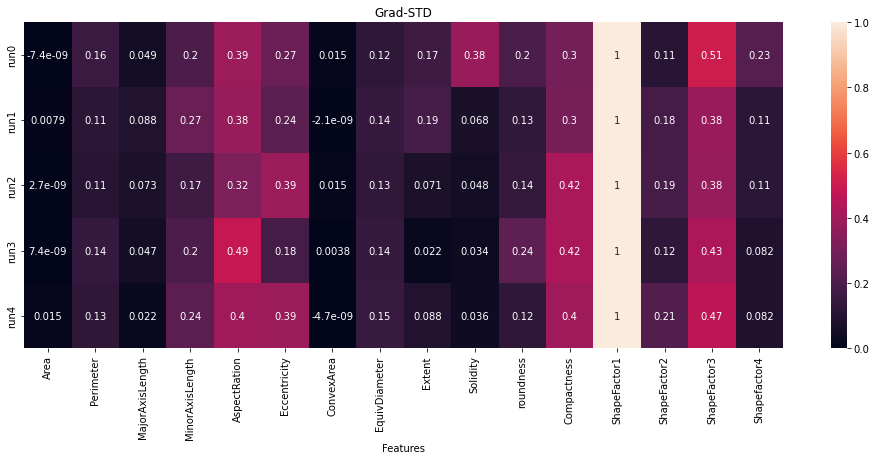

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, yticklabels=[ f"run{i}" for i in range(5)],annot=True)
plt.title("Grad-STD")
plt.xlabel("Features")

#### ROC

In [30]:
from utilities.subset_func import return_epoch_stat
from sklearn.preprocessing import MinMaxScaler
import pickle

channels=["Area","Perimeter","MajorAxisLength","MinorAxisLength","AspectRation",
                               "Eccentricity","ConvexArea","EquivDiameter","Extent","Solidity","roundness","Compactness",
                               "ShapeFactor1", "ShapeFactor2","ShapeFactor3","Shapefactor4"]
folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/DryBean/exp_log{folder}/Grad/list/DryBean-Grad-list-200.pkl","rb"))
    grad_all= np.array(grads).reshape(200,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for i in range(len(channels)):
        rolled= np.roll( epoch[:, i], 1 )
        rolled[0]=0.
        diff= epoch[:, i]-rolled
        dictionary[channels[i]]= np.trapz(abs(diff))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
    
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [10,20,30,40,50,60,70,80,90]))
    

[0.09844815 0.14747495 0.209969   0.26025676 0.3274019  0.38546652
 0.42270408 0.51504826 0.70641726]
[0.08361489 0.16145204 0.1681548  0.29663595 0.34992936 0.44119066
 0.45097008 0.59351124 0.66253778]
[0.06482159 0.09780023 0.19119581 0.32102558 0.32965247 0.37243858
 0.44164229 0.55560709 0.62407484]
[0.10893918 0.22441014 0.24673082 0.26703507 0.36858353 0.44821561
 0.51121231 0.55455773 0.85433065]
[0.05986206 0.22686461 0.25961234 0.28820636 0.34467335 0.46452865
 0.4980973  0.57523492 0.72411464]


Text(0.5, 33.0, 'Features')

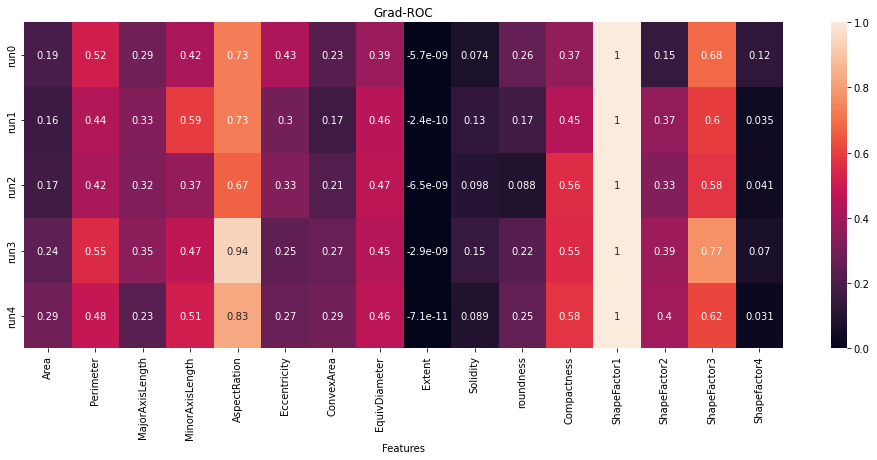

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, yticklabels=[ f"run{i}" for i in range(5)],annot=True)
plt.title("Grad-ROC")
plt.xlabel("Features")

#### COV

In [26]:
from utilities.subset_func import return_epoch_stat, process_cov
from sklearn.preprocessing import MinMaxScaler
import pickle

channels=["Area","Perimeter","MajorAxisLength","MinorAxisLength","AspectRation",
                               "Eccentricity","ConvexArea","EquivDiameter","Extent","Solidity","roundness","Compactness",
                               "ShapeFactor1", "ShapeFactor2","ShapeFactor3","Shapefactor4"]
folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/DryBean/exp_log{folder}/Grad/list/DryBean-Grad-list-200.pkl","rb"))
    grad_all= np.array(grads).reshape(200,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary= process_cov(epoch, abs(np.cov(epoch.T )).mean(), channels)
    
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
    
    folder_dictionary.append(dictionary.copy())
    print(np.percentile(list(dictionary.values()), [10,20,30,40,50,60,70,80,90]))
    

Threshold:  321243.6683241542

[0.         0.04001881 0.10151298 0.14145965 0.29372566 0.36983486
 0.40819507 0.4801678  0.70281315]
Threshold:  361876.3610713212

[0.         0.         0.08065585 0.27205995 0.33012231 0.43836237
 0.50584926 0.62036871 0.71462454]
Threshold:  347529.6524047648

[0.         0.         0.12955503 0.22924623 0.32395527 0.43419666
 0.46905943 0.58877338 0.66345339]
Threshold:  319519.58104644145

[0.         0.03390165 0.13807066 0.18314461 0.29302899 0.41296468
 0.47963436 0.53284723 0.80122501]
Threshold:  288671.34134898987

[0.         0.03638721 0.1941555  0.22546194 0.27141518 0.41871041
 0.50097825 0.61436822 0.73906252]


Text(0.5, 33.0, 'Features')

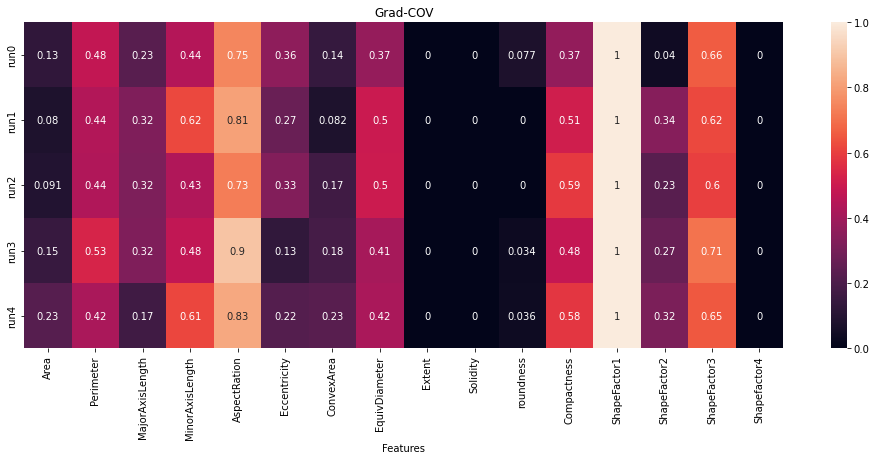

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, yticklabels=[ f"run{i}" for i in range(5)], annot=True)
plt.title("Grad-COV")
plt.xlabel("Features")

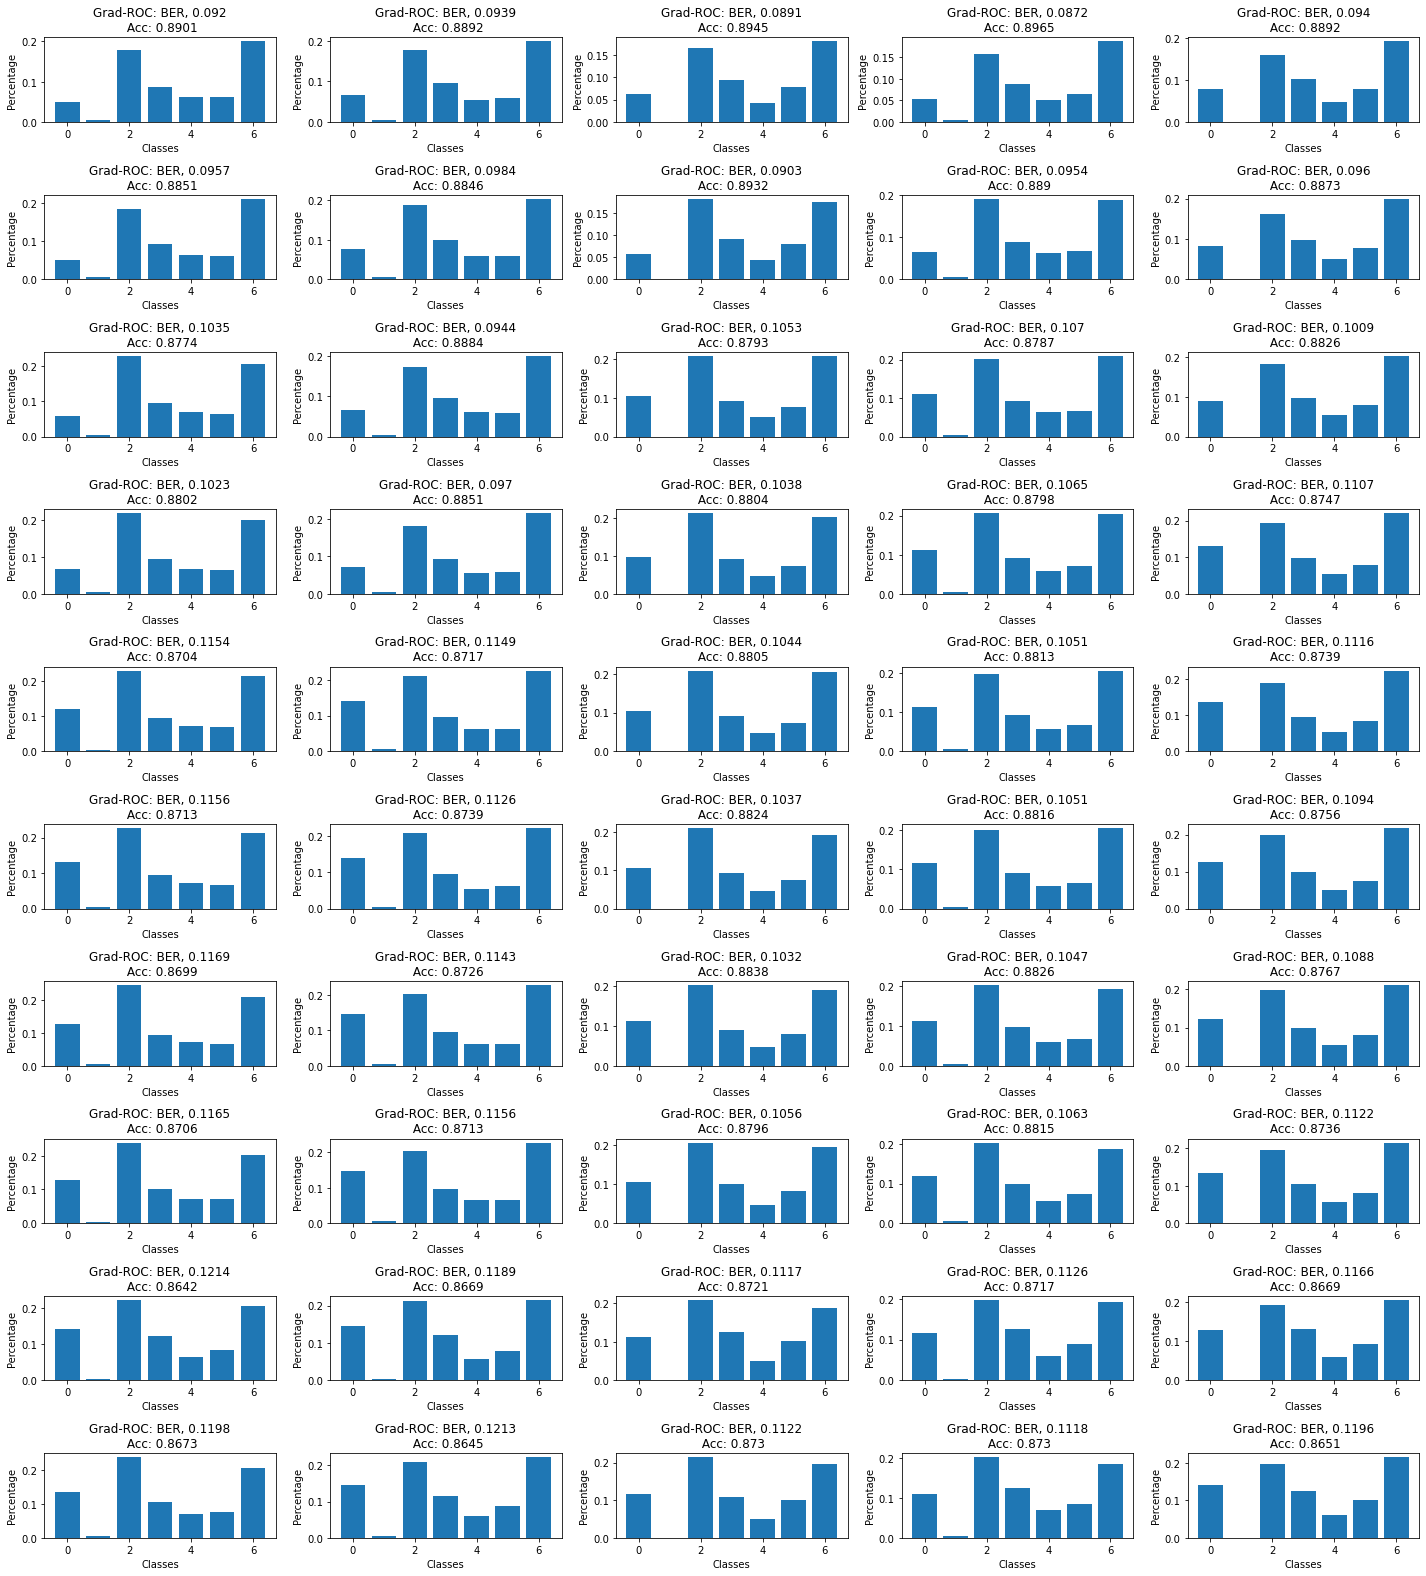

In [153]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline", "NFS":"NFS",
               "Weight":"Weight", "Grad-AUC":"Grad", "Grad-ROC":"Grad", "Grad-STD":"Grad", "Grad-COV":"Grad"} #folder: model
model="Grad-ROC"
epoch=200
nfs_ber=[]

fig.set_figheight(22)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{original_dict[model]}/DryBean-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{original_dict[model]}/DryBean-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    bers=[]
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{original_dict[model]}/subset/DryBean-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{original_dict[model]}/subset/DryBean-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
        bers.append(round(np.mean(ber),4))
    nfs_ber.append(bers)
    j += 1; i=1
nfs_ber= np.array(nfs_ber)
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

## Weight Heatmap

In [23]:
from sklearn.preprocessing import MinMaxScaler
import pickle
ws=[]
# original_dict={"Grad-sum":"Grad", "Grad-std":"Grad"} #folder: model
# model="Grad-sum"

original_dict={"DF":"DF", "RS":"RS", "Fisher":"Baseline", "FScore":"Baseline", "NFS":"NFS",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight"} #folder: model
model="NFS"


for folder in range(5):
    scaler= MinMaxScaler()
    w= pickle.load( open(f"./experiments/DryBean/exp_log{folder}/{original_dict[model]}/DryBean-{model}-w-200.pkl", "rb") )
    w= scaler.fit_transform(w.reshape(-1,1)).reshape(-1)
    print(w)
    ws.append(w)
        #         bers.append(ber)
#     print("percentile "+str(percentile),round(np.mean(bers), 4))


[0.4314731  0.9999999  0.03841718 0.81735426 0.35178813 0.17605068
 0.5224203  0.7240523  0.71560276 0.         0.27282274 0.64681464
 0.8611083  0.8147094  0.19659738 0.08201121]
[0.11917754 0.         0.3213086  0.13980798 0.02867963 0.33270296
 0.6624927  0.99999994 0.75632465 0.07539167 0.73683685 0.4294878
 0.30292335 0.32862812 0.816667   0.56741935]
[1.         0.5611138  0.53556806 0.78207916 0.42811418 0.6450895
 0.9754683  0.2848291  0.5657747  0.         0.6552434  0.7506133
 0.5810129  0.6888279  0.87425625 0.15886468]
[0.31050575 0.         0.38137472 0.426018   0.02385818 0.09706533
 0.43637878 0.9686306  0.19736512 0.04654098 0.51994663 0.5925973
 0.88196814 0.5195843  1.         0.34966236]
[0.403608   0.79740036 0.388497   0.7100004  0.8530763  0.99988997
 0.         0.8495055  0.8063659  0.4216992  0.41895196 1.0000001
 0.365924   0.3370716  0.5716221  0.00721909]


Text(0.5, 1.0, 'NFS')

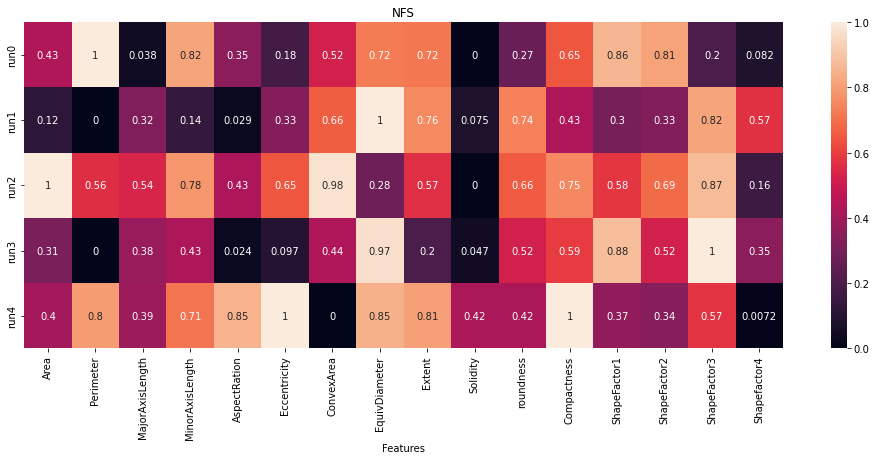

In [24]:
import seaborn as sns
import pandas as pd
x_labels=["Area","Perimeter","MajorAxisLength","MinorAxisLength","AspectRation",
                               "Eccentricity","ConvexArea","EquivDiameter","Extent","Solidity","roundness","Compactness",
                               "ShapeFactor1", "ShapeFactor2","ShapeFactor3","Shapefactor4"]
plt.figure(figsize=(17,6))
sns.heatmap(pd.DataFrame(ws), xticklabels=x_labels, yticklabels=[ f"run{i}" for i in range(5)], annot=True)
plt.xlabel("Features")

plt.title(model)

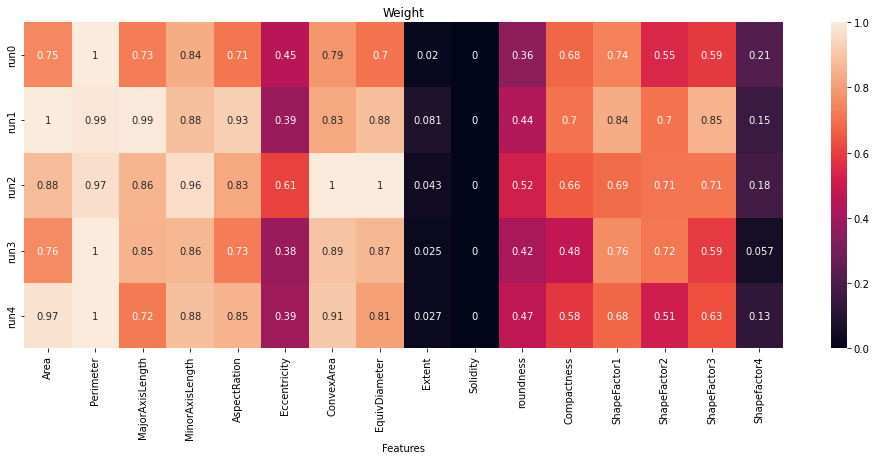

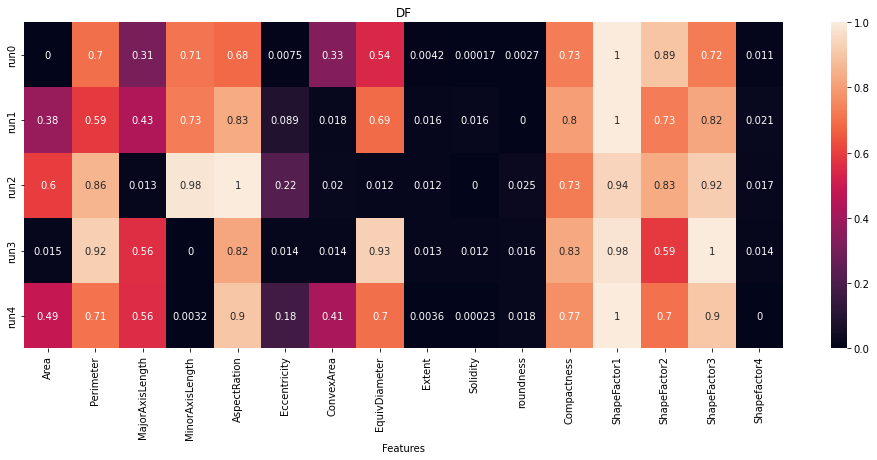

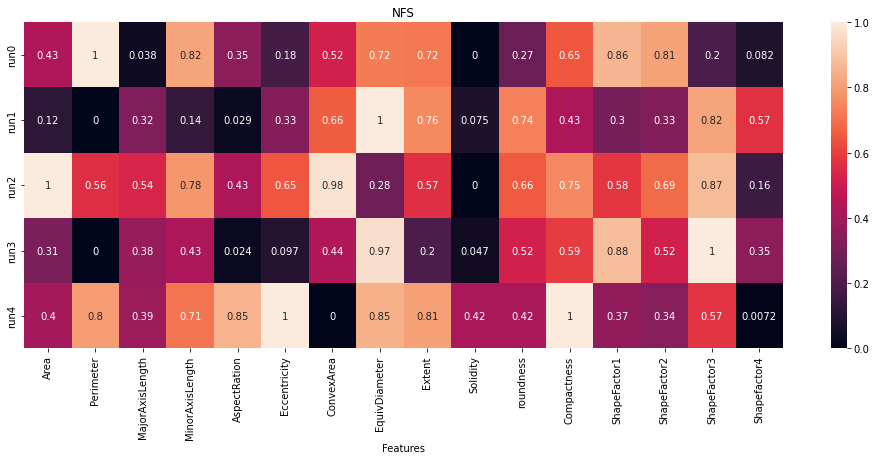

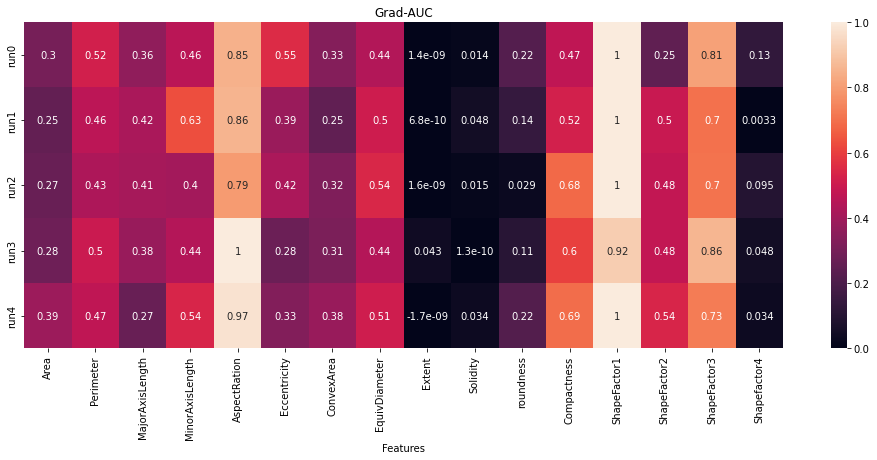

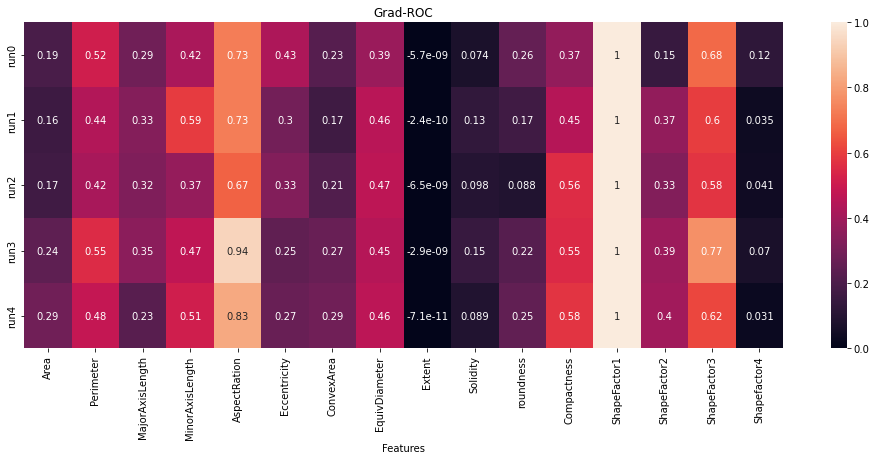

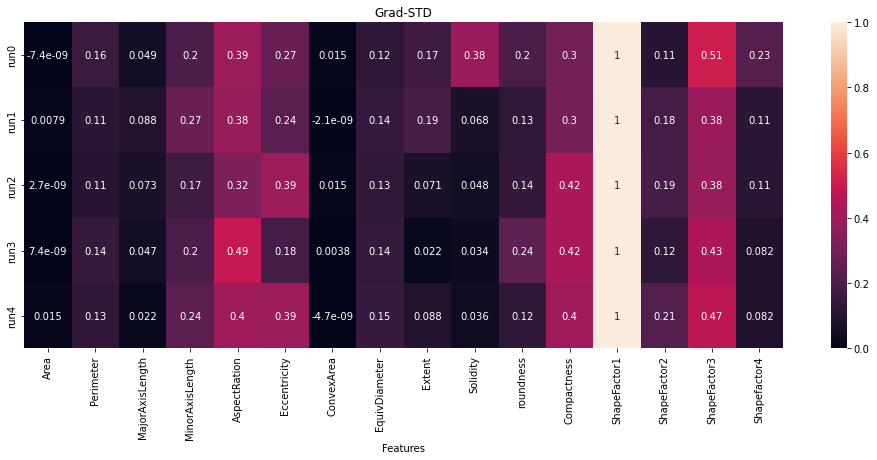

## Individual Folder

Text(0.5, 0, 'Discard Percentage')

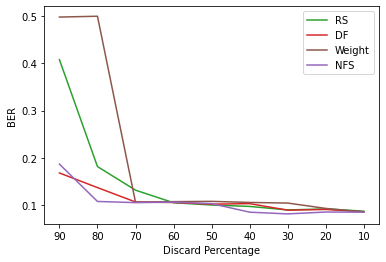

In [247]:
import matplotlib.pyplot as plt
import pickle
import numpy as np


# fig, axes= plt.subplots(5,7)
i=0; j=0

folder="2"

# models={"Fisher":[], "FScore":[], "RS":[], "DF":[], "Simul":[], "ThresholdedSimul":[]}
models={ "RS":[], "DF":[], "Weight":[], "NFS":[]}
for_range= range(90,0,-10)
for model in models.keys():
    for percentage in for_range:
        
        if percentage==0:
            continue
        
        ber= pickle.load(open(f"./experiments/DryBean/exp_log{folder}/{model}/subset/DryBean-subset-{model}-{percentage}-ber.pkl", "rb"))

        models[model].append(round(np.mean(ber),4))
        
# models["Grad-sum"]=[]
# models["Grad-std"]=[]

# for model_dir, model in [("Grad", "Grad-std"), ("Grad", "Grad-sum")]:
#     for percentage in for_range:
        
#         if percentage==0:
#             continue
        
#         ber= pickle.load(open("./experiments/Benchmark/exp_log"+folder+"/"+model_dir+"/subset/benchmark-subset-"+model+"-"+dataset+"-"+str(percentage)+"-ber.pkl", "rb"))

#         models[model].append(round(np.mean(ber),4))
        

        #["subset-DF","subset-simul"]
for model, result in models.items():
    plt.plot(result, color=palette[colour[model]])
plt.legend(models.keys())
plt.xticks(range(len(for_range)),labels=[str(i) for i in for_range])
plt.ylabel("BER")
plt.xlabel("Discard Percentage")
# plt.ylim(top=1.0)

#         axes[i][j].set_title("BER, "+str(round(np.mean(ber),4)))
#         axes[i][j].set_xlabel("Classes")
#         axes[i][j].set_ylabel("Percentage")
#         axes[i][j].set_ylim([0, 0.7])
# #     print(plt.yticks())
# #     axes[i][j].set_yticks(["0."+str(z) for z in range(10)])
    
    
#         if j<6:
#             j+=1
#         elif j==6:
#             i+=1; j=0

# plt.suptitle("Dataset: "+dataset )
# # plt.tight_layout()
# fig.set_figheight(10)
# fig.set_figwidth(20)
# plt.tight_layout()

## Subset

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [18]:
complete_set= [("RS", "RS"), ("Fisher","Fisher"), ("FScore", "FScore"),("DF","DF"),("NFS", "NFS"),("Weight", "Weight"), ("Grad", "Grad-AUC"), ("Grad","Grad-ROC"), ("Grad", "Grad-STD")]

In [17]:
name_set= [("RS", "RS"),("Fisher","Fisher"), ("FScore", "FScore"),("DF","DF"),("NFS", "NFS"),("Weight", "Weight-Naive"), ("Grad", "Grad-AUC"), ("Grad","Grad-ROC"), ("Grad", "Grad-STD")]

In [22]:
existing_methods= [("Fisher","Fisher"), ("FScore", "FScore"),("RS", "RS"),("DF","DF")]

In [474]:
simul_comparison= [("Weight", "Weight"), ("ThresholdedWeight", "ThresholdedWeight"), ("RS", "RS"),("DF","DF")]

In [18]:
grad_comparison= [("Grad","Grad-AUC"), ("Grad", "Grad-ROC"), ("RS", "RS"),("DF","DF")]

In [24]:
developing_methods= [("Grad","Grad-ROC"), ("Grad","Grad-AUC")]

In [19]:
import seaborn as sns
# palette= sns.color_palette(as_cmap=True)
rocket_palette= sns.color_palette("rocket",as_cmap=True)
viridisr_palette= sns.color_palette("viridis_r",as_cmap=True)
viridis_palette= sns.color_palette("viridis",as_cmap=True)
colour={}
# for i, j in zip(range(len(complete_set)), [z[1] for z in complete_set]):
#     colour[j]= i

colour["RS"]= rocket_palette.colors[100]

for i, j in zip(['Fisher', 'FScore'], [rocket_palette.colors[160], rocket_palette.colors[210]]):
    colour[i]= j
    
for i, j in zip(["DF", "NFS", "Weight"], [viridisr_palette.colors[190], viridisr_palette.colors[215], viridisr_palette.colors[250]]):
    colour[i]= j
    
for i, j in zip(["Grad-AUC", "Grad-ROC", "Grad-STD"], [viridis_palette.colors[140], viridis_palette.colors[190], viridis_palette.colors[220]]):
    colour[i]=j
colour

{'RS': [0.61792306, 0.10325288, 0.35760108],
 'Fisher': [0.92676657, 0.29823282, 0.24285536],
 'FScore': [0.96403203, 0.65122535, 0.4932578],
 'DF': [0.227802, 0.326594, 0.546532],
 'NFS': [0.270595, 0.214069, 0.507052],
 'Weight': [0.273809, 0.031497, 0.358853],
 'Grad-AUC': [0.119423, 0.611141, 0.538982],
 'Grad-ROC': [0.35236, 0.783011, 0.392636],
 'Grad-STD': [0.636902, 0.856542, 0.21662]}

In [20]:
ber_dictionary={}
cr_dictionary={}
for_range= range(90,-10,-10)
# model_list= existing_methods+[("Simul", "Simul"), ("ThresholdedSimul", "ThresholdedSimul")] # simul
# model_list= developing_methods #s+[("RS", "RS"), ("DF", "DF")]
# model_list=[("Grad","Grad-sum"), ("Grad", "Grad-std"), ("DF", "DF")] # grad
# model_list= grad_comparison+[("Simul", "Simul"), ("Fisher","Fisher"), ("FScore", "FScore")] # outlier
epoch=200
model_list= complete_set
for model_dir, model in model_list:
    ber={}
    dictionary={}
    for folder in ["0", "1", "2", "3","4"]:
        ber[folder]=[]
        dictionary[folder]=[]
        for percentage in [str(i) for i in for_range]:
            ber[folder].append( np.mean( pickle.load(open(f"./experiments/DryBean/exp_log{folder}/{model_dir}/subset/DryBean-subset-{model}-{percentage}-ber-{epoch}.pkl", "rb")) ) )
            tmp= pickle.load(open(f"./experiments/DryBean/exp_log{folder}/{model_dir}/subset/DryBean-subset-{model}-{percentage}-v_dict-{epoch}.pkl", "rb") )
            dictionary[folder].append( tmp  )
    ber_dictionary[model]= ber
    cr_dictionary[model]= dictionary
    
ber_dictionary_average_plt={}
ber_dictionary_average_sns={}
cr_dictionary_average_plt={}
cr_dictionary_average_sns={}
for i in ber_dictionary.keys():
    average=[]
    metrics_report=[]
    for j in ber_dictionary[i].keys():
        average.append(ber_dictionary[i][j])
        metrics_report.append( [ z["macro avg"]["f1-score"] for z in cr_dictionary[i][j] ] )
#     print(average)
    ber_dictionary_average_sns[i]= average#np.array(average).mean(axis=0)
    ber_dictionary_average_plt[i]= np.array(average).mean(axis=0)    
    cr_dictionary_average_sns[i]= metrics_report
    cr_dictionary_average_plt[i]= np.array(metrics_report).mean(axis=0)

In [21]:
for i in ber_dictionary_average_plt.keys():
#     print(i, np.flip(ber_dictionary_average_plt[i]) ) 
    print(i)
    
    for j in np.flip(ber_dictionary_average_plt[i]):
        print(round(j,4), end="")
        print(" & ", end="")
    print(); print()

RS
0.0922 & 0.0929 & 0.0937 & 0.0958 & 0.0982 & 0.1034 & 0.1048 & 0.1282 & 0.1759 & 0.4114 & 

Fisher
0.0922 & 0.0912 & 0.0957 & 0.1099 & 0.111 & 0.1111 & 0.1129 & 0.1537 & 0.4113 & 0.5128 & 

FScore
0.0922 & 0.0898 & 0.0961 & 0.1106 & 0.1102 & 0.1111 & 0.1123 & 0.1678 & 0.4201 & 0.5125 & 

DF
0.1382 & 0.0939 & 0.098 & 0.1047 & 0.1064 & 0.1095 & 0.1095 & 0.1094 & 0.1133 & 0.1164 & 

NFS
0.0949 & 0.0941 & 0.0942 & 0.0922 & 0.0977 & 0.0964 & 0.1007 & 0.104 & 0.2049 & 0.3157 & 

Weight
0.0881 & 0.0912 & 0.1013 & 0.1104 & 0.111 & 0.1119 & 0.1191 & 0.1283 & 0.3482 & 0.4004 & 

Grad-AUC
0.0912 & 0.0936 & 0.1102 & 0.1106 & 0.1095 & 0.1097 & 0.1107 & 0.1115 & 0.1171 & 0.1166 & 

Grad-ROC
0.0912 & 0.0952 & 0.1022 & 0.1041 & 0.1103 & 0.1093 & 0.1096 & 0.1112 & 0.1163 & 0.1169 & 

Grad-STD
0.0912 & 0.0908 & 0.0891 & 0.0932 & 0.1007 & 0.1034 & 0.1092 & 0.1119 & 0.1171 & 0.1166 & 



In [22]:
print("AUC") # larger it is, worse it is
for i in ber_dictionary_average_plt.keys():
#     print()
#     for j in np.flip(cr_dictionary_average_plt[i])[1:]:
#         print(round(j, 4), end="")
#         print(" & ", end="")
    print(i, round(np.trapz(np.flip(ber_dictionary_average_plt[i])[1:]),4) ) 
    print(); print()

AUC
RS 1.0522


Fisher 1.4078


FScore 1.4292


DF 0.8559


NFS 0.9949


Weight 1.2759


Grad-AUC 0.8845


Grad-ROC 0.869


Grad-STD 0.8284




In [23]:
for i in cr_dictionary_average_plt.keys():
#     print(i, np.flip(ber_dictionary_average_plt[i]) ) 
    print(i)
    
    for j in np.flip(cr_dictionary_average_plt[i]):
        print(round(j,4), end="")
        print(" & ", end="")
    print(); print()

RS
0.8954 & 0.8949 & 0.8937 & 0.891 & 0.8869 & 0.876 & 0.8722 & 0.8471 & 0.8071 & 0.5986 & 

Fisher
0.8954 & 0.8964 & 0.8907 & 0.8751 & 0.8748 & 0.8703 & 0.8652 & 0.75 & 0.5446 & 0.5236 & 

FScore
0.8954 & 0.8988 & 0.8897 & 0.8743 & 0.8755 & 0.8717 & 0.8675 & 0.7371 & 0.5406 & 0.524 & 

DF
0.8258 & 0.8935 & 0.8898 & 0.8814 & 0.8799 & 0.8769 & 0.8774 & 0.8772 & 0.8707 & 0.8649 & 

NFS
0.8918 & 0.893 & 0.8937 & 0.8958 & 0.8887 & 0.8906 & 0.8835 & 0.8801 & 0.7627 & 0.6889 & 

Weight
0.9004 & 0.8966 & 0.8842 & 0.8754 & 0.8746 & 0.8729 & 0.8599 & 0.8191 & 0.5949 & 0.5851 & 

Grad-AUC
0.8966 & 0.8931 & 0.8749 & 0.875 & 0.8763 & 0.8766 & 0.8755 & 0.8745 & 0.8653 & 0.866 & 

Grad-ROC
0.8966 & 0.8919 & 0.8833 & 0.8817 & 0.8755 & 0.8766 & 0.8769 & 0.8746 & 0.8668 & 0.8658 & 

Grad-STD
0.8966 & 0.8979 & 0.9003 & 0.8948 & 0.8864 & 0.8838 & 0.8761 & 0.8713 & 0.8648 & 0.8644 & 



Text(0.5, 0.98, 'DryBean: Reduce and Retrain')

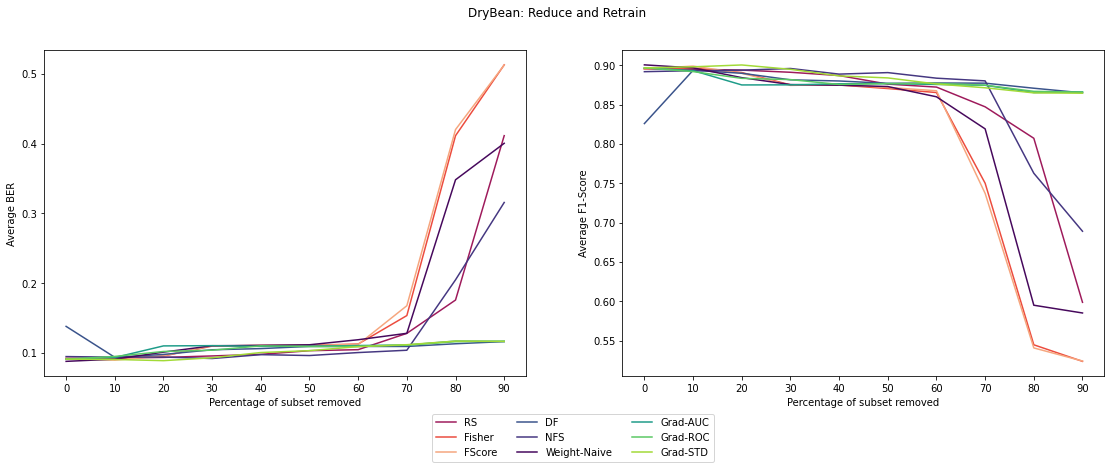

In [24]:
plt.figure(figsize=(19,6))
plt.subplot(1,2,1)
for i in ber_dictionary_average_plt.keys():
    plt.plot( np.flip(ber_dictionary_average_plt[i]),color=colour[i] )
    
# plt.legend(ber_dictionary_average_plt.keys(), ncol=3, loc=2)
plt.ylabel("Average BER")
plt.xlabel("Percentage of subset removed")
# _=plt.xticks([i for i in range(7)],[i for i in range(70,0,-10)])
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])
# dictionary_average_sns

plt.subplot(1,2,2)
for i in cr_dictionary_average_plt.keys():
    plt.plot( np.flip(cr_dictionary_average_plt[i]),color=colour[i] )
    
# plt.legend(cr_dictionary_average_plt.keys(), ncol=3, bbox_to_anchor=(0.2,-0.1))
plt.legend([j for i, j in name_set], ncol=3, bbox_to_anchor=(0.2,-0.1))
plt.ylabel("Average F1-Score")
plt.xlabel("Percentage of subset removed")
# _=plt.xticks([i for i in range(7)],[i for i in range(70,0,-10)])
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])
plt.suptitle("DryBean: Reduce and Retrain")

In [13]:
# plt.figure(figsize=(19,6))
# plt.subplot(1,2,1)
# for i in ber_dictionary_average_plt.keys():
#     plt.plot( np.flip(ber_dictionary_average_plt[i]),color=colour[i] )
    
# # plt.legend(ber_dictionary_average_plt.keys(), ncol=3, loc=2)
# plt.ylabel("Average BER")
# plt.xlabel("Percentage of subset removed")
# # _=plt.xticks([i for i in range(7)],[i for i in range(70,0,-10)])
# _=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])
# # dictionary_average_sns

# plt.subplot(1,2,2)
# for i in cr_dictionary_average_plt.keys():
#     plt.plot( np.flip(cr_dictionary_average_plt[i]),color=colour[i] )
    
# plt.legend(cr_dictionary_average_plt.keys(), ncol=3, bbox_to_anchor=(0.2,-0.1))
# plt.ylabel("Average accuracy")
# plt.xlabel("Percentage of subset removed")
# # _=plt.xticks([i for i in range(7)],[i for i in range(70,0,-10)])
# _=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])


In [221]:
import pandas as pd

plots=[]
for key, value in dictionary_average_sns.items():
    run=0
    data=[]
    for r in value:
        percentage=len(for_range)*10
        for p in r:
            data.append([run, percentage, p, key])
            percentage -= 10
        run += 1
    plots.append(pd.DataFrame(data, columns=['run', 'percentage', 'value', "method"]) )
# plot=pd.DataFrame(data, columns=['run', 'percentage', 'value'])
# plot

In [348]:
# plots= pd.concat(plots)
# plots

Text(0, 0.5, 'BER')

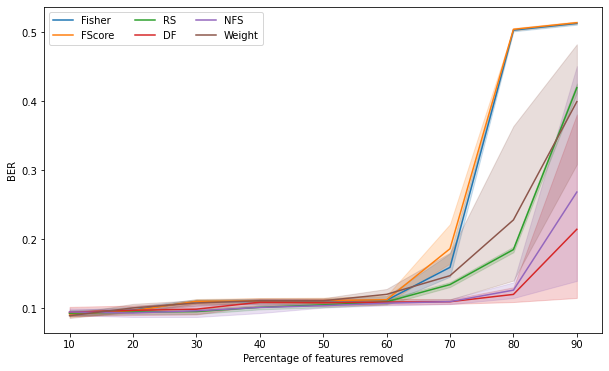

In [222]:
# legend_dict= {"Simul":"IE-Weight", "ThresholdedSimul":"IE-Weight-Thresholded", 
#               "RS":"RandomSelection", "DF":"DeepFeature", 
#               "Fisher":"FisherScore", "FScore":"FScore", 
#               "Grad-sum":"IE-Grad-sum", "Grad-std":"IE-Grad-std"}

# legend=[]
# for i in dictionary_average_plt.keys():
#     legend.append(legend_dict[i])

import seaborn as sns
import pandas as pd

plt.figure(figsize=(10,6))

for i, c in zip(plots, [palette[colour[i]] for i in [z[1] for z in model_list]]):
    sns.lineplot(data=i, x='percentage', y='value', color=c)
# sns.lineplot(data=plots, x='percentage', y='value')
# sns.lineplot(data=plot1, x='percentage', y='value', sort=False )
# _=plt.xticks([i for i in range(10,80,10)],[i for i in range(70,0,-10)])
# plt.legend(dictionary_average_plt.keys(), ncol=4)
plt.legend(dictionary_average_plt.keys(), ncol=3, loc=2)
# plt.legend(legend)
plt.xlabel("Percentage of features removed")
plt.ylabel("BER")


## Ranking of Feature

In [1]:
from utilities.preproc_func import return_epoch_stat
import pickle
import numpy as np

grads= pickle.load(open(f"./experiments/DryBean/exp_log3/Grad/list/DryBean-Grad-list-200.pkl","rb"))
grad_all= np.array(grads).reshape(200,-1,16)

epoch_sum= return_epoch_stat(grad_all, "sum")
epoch_std= return_epoch_stat(grad_all, "std")
epoch_mean= return_epoch_stat(grad_all, "mean")

In [2]:
channels=["Area","Perimeter","MajorAxisLength","MinorAxisLength","AspectRation",
                               "Eccentricity","ConvexArea","EquivDiameter","Extent","Solidity","roundness","Compactness",
                               "ShapeFactor1", "ShapeFactor2","ShapeFactor3","Shapefactor4"]

Text(0.5, 1.0, 'Abs. sum of gradients for each epoch')

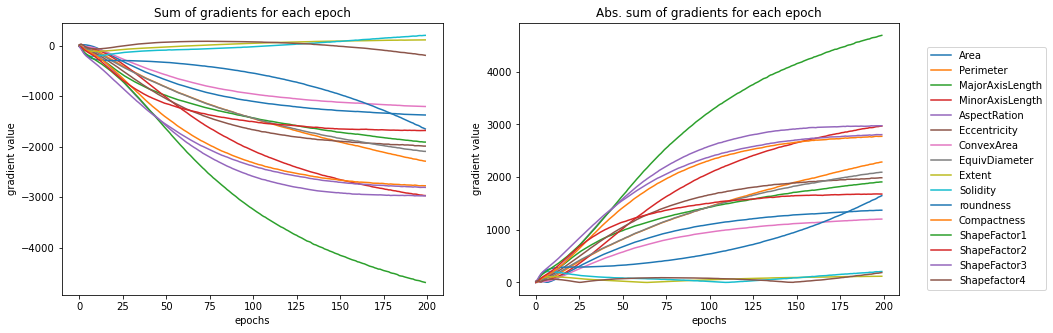

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(121)
_=plt.plot(epoch_sum)
# plt.legend(channels, loc=4, bbox_to_anchor=(1.5, 0.))
plt.xlabel("epochs"); plt.ylabel("gradient value")
plt.title("Sum of gradients for each epoch")

plt.subplot(122)
_=plt.plot(abs(epoch_sum))
plt.legend(channels, loc=4, bbox_to_anchor=(1.4, 0.))
plt.xlabel("epochs"); plt.ylabel("gradient value")
plt.title("Abs. sum of gradients for each epoch")

Text(0.5, 1.0, 'Abs. sum of gradients for each epoch')

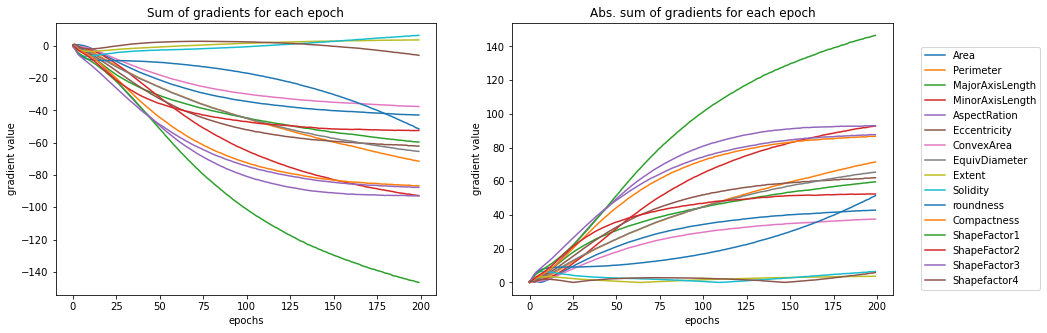

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(121)
_=plt.plot(epoch_mean)
# plt.legend(channels, loc=4, bbox_to_anchor=(1.5, 0.))
plt.xlabel("epochs"); plt.ylabel("gradient value")
plt.title("Sum of gradients for each epoch")

plt.subplot(122)
_=plt.plot(abs(epoch_mean))
plt.legend(channels, loc=4, bbox_to_anchor=(1.4, 0.))
plt.xlabel("epochs"); plt.ylabel("gradient value")
plt.title("Abs. sum of gradients for each epoch")

In [10]:
dictionary={}
for idx, name in zip(range(len(channels)), channels):
    dictionary[name]= np.trapz(abs(epoch_sum[:, idx]))

def dictionary_sort(x):
    return x[1]
sorted(dictionary.items(), key=dictionary_sort, reverse=True)

[('ShapeFactor1', 568283.75),
 ('AspectRation', 428601.06),
 ('ShapeFactor3', 407177.94),
 ('Compactness', 389659.88),
 ('MinorAxisLength', 358744.12),
 ('Eccentricity', 280467.88),
 ('Perimeter', 264212.06),
 ('ShapeFactor2', 260385.81),
 ('EquivDiameter', 257195.75),
 ('MajorAxisLength', 256096.36),
 ('Area', 186853.0),
 ('ConvexArea', 162229.44),
 ('roundness', 134412.34),
 ('Solidity', 18652.865),
 ('Extent', 13481.8),
 ('Shapefactor4', 12892.754)]

## Rate of Change

Text(0.5, 1.0, 'Rate of change for each epoch')

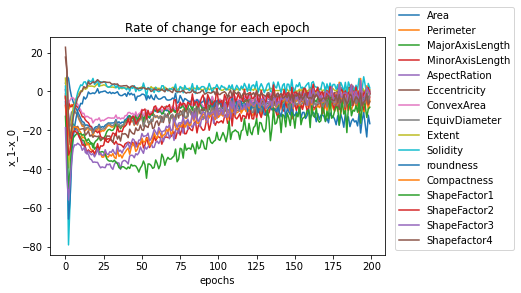

In [15]:
dictionary={}
for i in range(len(channels)):
    rolled= np.roll( epoch_sum[:, i], 1 )
    rolled[0]=0.
    diff= epoch_sum[:, i]-rolled
    dictionary[channels[i]]= np.trapz(abs(diff))
    plt.plot(diff)
plt.legend(channels, loc=4, bbox_to_anchor=(1.4, 0.))
plt.xlabel("epochs"); plt.ylabel("x_1-x_0")
plt.title("Rate of change for each epoch")

In [16]:
def dictionary_sort(x):
    return x[1]
sorted(dictionary.items(), key=dictionary_sort, reverse=True)

[('ShapeFactor1', 4679.5747),
 ('AspectRation', 3026.544),
 ('MinorAxisLength', 2967.9785),
 ('ShapeFactor3', 2834.2373),
 ('Compactness', 2815.101),
 ('Perimeter', 2282.5908),
 ('EquivDiameter', 2091.3154),
 ('Eccentricity', 2064.0874),
 ('MajorAxisLength', 1909.8528),
 ('ShapeFactor2', 1744.7878),
 ('roundness', 1639.6147),
 ('Area', 1416.2391),
 ('ConvexArea', 1208.7756),
 ('Solidity', 665.2913),
 ('Shapefactor4', 554.6682),
 ('Extent', 359.02814)]

## Covariance

In [3]:
from utilities.preproc_func import process_cov
dictionary= process_cov(epoch_sum, abs(np.cov(epoch_sum.T )).mean(), channels)

Threshold:  323614.74199299



In [4]:
def dictionary_sort(x):
    return x[1]
sorted(dictionary.items(), key=dictionary_sort, reverse=True)

[('ShapeFactor1', 10751944.136247745),
 ('MinorAxisLength', 7559642.9383977465),
 ('AspectRation', 7081558.984938786),
 ('Compactness', 6221245.634632489),
 ('ShapeFactor3', 5910634.942015237),
 ('Perimeter', 4412882.606250702),
 ('EquivDiameter', 3815033.9046747913),
 ('Eccentricity', 3698678.1065408452),
 ('MajorAxisLength', 2901171.808187073),
 ('ShapeFactor2', 2174694.1440042416),
 ('Area', 2084871.172551922),
 ('ConvexArea', 1210456.8036808125),
 ('roundness', 854867.4030167907),
 ('Extent', 0),
 ('Solidity', 0),
 ('Shapefactor4', 0)]

In [5]:
from utilities.preproc_func import alternate_rank

alternate_rank(dictionary)

[12, 3, 4, 11, 14, 1, 7, 5, 2, 13, 0, 6, 10, 8, 9, 15]

In [8]:
from utilities.preproc_func import select_features

select_features(alternate_rank(dictionary), len(dictionary), 10)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False])

In [46]:
np.percentile(tmp, [10,20,30,40,50,60])

array([      0.        ,  854867.40301679, 1647663.98811637,
       2174694.14400424, 3299924.95736396, 3815033.90467479])

In [31]:
def dictionary_sort(x):
    return x[1][1]
sorted_array= sorted(enumerate(dictionary.items()), key=dictionary_sort, reverse=True)
sorted_array

[(12, ('ShapeFactor1', 10751944.136247745)),
 (3, ('MinorAxisLength', 7559642.9383977465)),
 (4, ('AspectRation', 7081558.984938786)),
 (11, ('Compactness', 6221245.634632489)),
 (14, ('ShapeFactor3', 5910634.942015237)),
 (1, ('Perimeter', 4412882.606250702)),
 (7, ('EquivDiameter', 3815033.9046747913)),
 (5, ('Eccentricity', 3698678.1065408452)),
 (2, ('MajorAxisLength', 2901171.808187073)),
 (13, ('ShapeFactor2', 2174694.1440042416)),
 (0, ('Area', 2084871.172551922)),
 (6, ('ConvexArea', 1210456.8036808125)),
 (10, ('roundness', 854867.4030167907)),
 (8, ('Extent', 0)),
 (9, ('Solidity', 0)),
 (15, ('Shapefactor4', 0))]

In [33]:
idx_rank=[idx for idx, _ in sorted_array]
idx_rank
    

[12, 3, 4, 11, 14, 1, 7, 5, 2, 13, 0, 6, 10, 8, 9, 15]

In [39]:
limit= round(len(idx_rank) *0.8)
idx_rank[:limit]

[12, 3, 4, 11, 14, 1, 7, 5, 2, 13, 0, 6, 10]

In [41]:
tmp= np.zeros(len(idx_rank), dtype=bool)
tmp[idx_rank[:limit]]=True
tmp

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False])

## Performance Retention

In [1]:
import pickle
import numpy as np

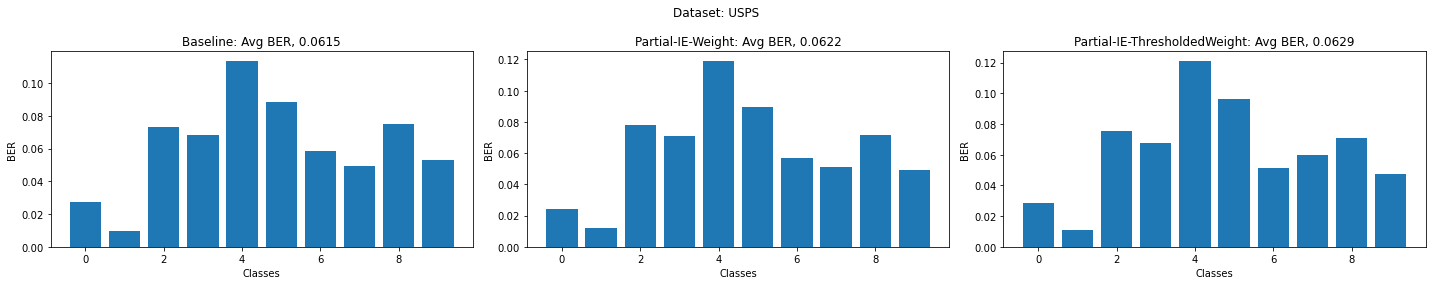

In [89]:
# Performance Retention
import matplotlib.pyplot as plt
import pickle
import numpy as np

fig, axes= plt.subplots(1,3)
i=0; j=0
dataset= "USPS"
folder_dict={"Baseline":"Baseline", 
             "Phases-Weight":"Phases",
             "Phases-ThresholdedWeight":"Phases"} #model: folder

dict_name= {"Baseline":"Baseline", "Phases-Weight":"Partial-IE-Weight", "Phases-ThresholdedWeight":"Partial-IE-ThresholdedWeight"}

plt.suptitle("Dataset: "+dataset )
# fig.set_figheight(15)
fig.set_figwidth(20)

for model in folder_dict.keys():
    avg= []
    for folder in range(5):
        ber= pickle.load( open("./experiments/Benchmark/exp_log"+str(folder)+"/"+folder_dict[model]+"/benchmark-"+model+"-"+dataset+"-ber.pkl", "rb") )
#         print(ber)
        avg.append(ber)
    
    axes[j].bar([i for i in range(len(ber))], np.array(avg).mean(axis=0))
    axes[j].set_title(dict_name[model]+": Avg BER, "+str(round(np.array(avg).mean(),4)))
    axes[j].set_xlabel("Classes")
    axes[j].set_ylabel("BER")
    j += 1
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

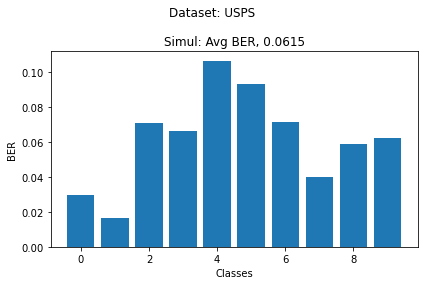

In [549]:
# Performance Retention
import matplotlib.pyplot as plt
import pickle
import numpy as np

# fig, axes= plt.subplots(1,3)
fig= plt.figure()
i=0; j=0
dataset= "USPS"
folder_dict={"Weight":"Weight"} #model: folder


plt.suptitle("Dataset: "+dataset )
# fig.set_figheight(15)
# fig.set_figwidth(20)

for model in folder_dict.keys():
    avg= []
    for folder in range(5):
        ber= pickle.load( open("./experiments/Benchmark/exp_log"+str(folder)+"/"+folder_dict[model]+"/benchmark-"+model+"-"+dataset+"-ber.pkl", "rb") )
#         print(ber)
        avg.append(ber)
    
    plt.bar([i for i in range(len(ber))], np.array(avg).mean(axis=0))
    plt.title(model+": Avg BER, "+str(round(np.array(avg).mean(),4)))
    plt.xlabel("Classes")
    plt.ylabel("BER")
    j += 1
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])